# Imports

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

import torch
import torchvision.transforms.functional as TF
from torchvision.utils import save_image

from depth_anything_3.api import DepthAnything3

# Loading model

In [8]:
# Load model from Hugging Face Hub
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DepthAnything3.from_pretrained("depth-anything/DA3NESTED-GIANT-LARGE")
model = model.to(device=device)
model.eval()
print('Model loaded!')

[INFO ] using SwiGLU layer as FFN
[INFO ] using MLP layer as FFN
Model loaded!


# Toy Example

In [9]:
toy_image = ['/home/alumno/Desktop/datos/Computer Vision/depth-anything-3/CamVid/train/0001TP_009210.png']

In [10]:
toy_pred = model.inference(
    toy_image,
    process_res=960
)
print(toy_pred.depth[0].shape)
print(toy_pred.conf[0].shape)

[INFO ] Processed Images Done taking 1.124277114868164 seconds. Shape:  torch.Size([1, 3, 714, 966])
[INFO ] Model Forward Pass Done. Time: 3.9696338176727295 seconds
[INFO ] Conversion to Prediction Done. Time: 0.003013134002685547 seconds
(714, 966)
(714, 966)


In [11]:
print(type(toy_pred.depth[0]))
print(type(toy_pred.conf[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
torch.cuda.is_available()

True

In [13]:
# Convert numpy array to tensor
depth_tensor = torch.from_numpy(toy_pred.depth[0])

# Add batch and channel dimensions: (H, W) -> (1, 1, H, W)
depth_tensor = depth_tensor.unsqueeze(0).unsqueeze(0)

# Resize to 720x960
resized = TF.resize(depth_tensor, size=[720, 960], antialias=True)

# Remove batch and channel dimensions: (1, 1, H, W) -> (H, W)
resized = resized.squeeze(0).squeeze(0)

# Convert back to numpy if needed
resized_numpy = resized.numpy()

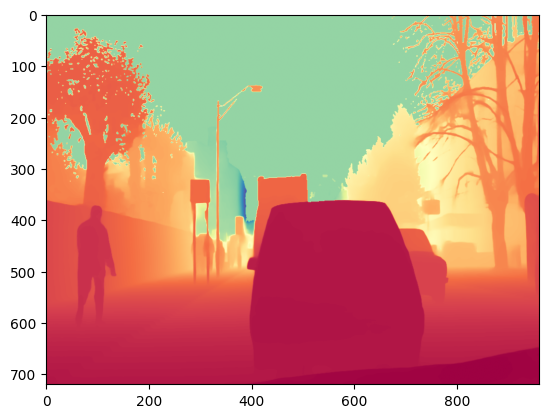

In [14]:
plt.imshow(resized_numpy, cmap='Spectral')

In [15]:
# Save as .npy file (preserves exact float values)
np.save('depth_map.npy', resized_numpy)

# Load it back later
loaded = np.load('depth_map.npy')

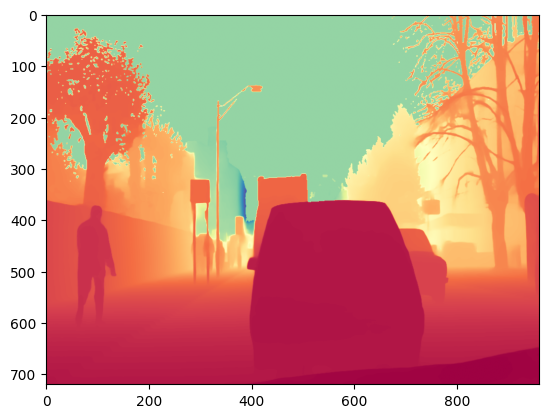

In [16]:
plt.imshow(loaded, cmap='Spectral')

# Depth maps generation

## Train split

In [17]:
INPUT_DIR = '../CamVid/train/'
OUTPUT_DIR = '../CamVid/train_labels/'
DEPTH_MAP_DIR = 'train_depths/'
CONFS_DIR = 'train_confs/'
IMAGES = os.listdir(INPUT_DIR)

In [18]:
for img in tqdm(IMAGES):
    pred = model.inference(
        [INPUT_DIR + img],
        process_res=960
    )

    # Convert numpy array to tensor
    depth_tensor = torch.from_numpy(pred.depth[0])
    
    # Add batch and channel dimensions: (H, W) -> (1, 1, H, W)
    depth_tensor = depth_tensor.unsqueeze(0).unsqueeze(0)
    
    # Resize to 720x960
    resized = TF.resize(depth_tensor, size=[720, 960], antialias=True)
    
    # Remove batch and channel dimensions: (1, 1, H, W) -> (H, W)
    resized = resized.squeeze(0).squeeze(0)
    
    # Convert back to numpy if needed
    resized_numpy = resized.numpy()

    np.save(OUTPUT_DIR + DEPTH_MAP_DIR + img.replace('png', 'npy'), resized_numpy)

    conf_tensor = torch.from_numpy(pred.conf[0])
    conf_tensor = conf_tensor.unsqueeze(0).unsqueeze(0)
    resized_conf = TF.resize(conf_tensor, size=[720, 960], antialias=True)
    resized_conf_numpy = resized_conf.squeeze(0).squeeze(0).numpy()
    
    # Save resized confidence
    np.save(OUTPUT_DIR + CONFS_DIR + img.replace('png', 'npy'), resized_conf_numpy)

  0%|                                                   | 0/369 [00:00<?, ?it/s]

[INFO ] Processed Images Done taking 0.07963371276855469 seconds. Shape:  torch.Size([1, 3, 714, 966])
[INFO ] Model Forward Pass Done. Time: 0.37464308738708496 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008928775787353516 seconds


  0%|                                           | 1/369 [00:00<04:33,  1.34it/s]

[INFO ] Processed Images Done taking 0.4219496250152588 seconds. Shape:  torch.Size([1, 3, 714, 966])


  1%|▏                                          | 2/369 [00:01<04:51,  1.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.34912562370300293 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010347366333007812 seconds
[INFO ] Processed Images Done taking 0.07723188400268555 seconds. Shape:  torch.Size([1, 3, 714, 966])


  1%|▎                                          | 3/369 [00:02<04:02,  1.51it/s]

[INFO ] Model Forward Pass Done. Time: 0.35289883613586426 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013587474822998047 seconds
[INFO ] Processed Images Done taking 0.08389067649841309 seconds. Shape:  torch.Size([1, 3, 714, 966])


  1%|▍                                          | 4/369 [00:02<03:41,  1.65it/s]

[INFO ] Model Forward Pass Done. Time: 0.3552684783935547 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008814334869384766 seconds
[INFO ] Processed Images Done taking 0.10576844215393066 seconds. Shape:  torch.Size([1, 3, 714, 966])


  1%|▌                                          | 5/369 [00:03<03:29,  1.73it/s]

[INFO ] Model Forward Pass Done. Time: 0.3475773334503174 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0023467540740966797 seconds
[INFO ] Processed Images Done taking 0.07210230827331543 seconds. Shape:  torch.Size([1, 3, 714, 966])


  2%|▋                                          | 6/369 [00:03<03:25,  1.77it/s]

[INFO ] Model Forward Pass Done. Time: 0.35647082328796387 seconds
[INFO ] Conversion to Prediction Done. Time: 0.004594564437866211 seconds
[INFO ] Processed Images Done taking 0.14852261543273926 seconds. Shape:  torch.Size([1, 3, 714, 966])


  2%|▊                                          | 7/369 [00:04<03:25,  1.76it/s]

[INFO ] Model Forward Pass Done. Time: 0.35087084770202637 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010058879852294922 seconds
[INFO ] Processed Images Done taking 0.07599782943725586 seconds. Shape:  torch.Size([1, 3, 714, 966])


  2%|▉                                          | 8/369 [00:04<03:21,  1.79it/s]

[INFO ] Model Forward Pass Done. Time: 0.3534433841705322 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009238719940185547 seconds
[INFO ] Processed Images Done taking 0.1945967674255371 seconds. Shape:  torch.Size([1, 3, 714, 966])


  2%|█                                          | 9/369 [00:05<03:26,  1.74it/s]

[INFO ] Model Forward Pass Done. Time: 0.35127735137939453 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008525848388671875 seconds
[INFO ] Processed Images Done taking 0.11772608757019043 seconds. Shape:  torch.Size([1, 3, 714, 966])


  3%|█▏                                        | 10/369 [00:05<03:20,  1.79it/s]

[INFO ] Model Forward Pass Done. Time: 0.35559654235839844 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009663105010986328 seconds
[INFO ] Processed Images Done taking 0.07019352912902832 seconds. Shape:  torch.Size([1, 3, 714, 966])


  3%|█▎                                        | 11/369 [00:06<03:12,  1.86it/s]

[INFO ] Model Forward Pass Done. Time: 0.3482635021209717 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010309219360351562 seconds
[INFO ] Processed Images Done taking 0.14789128303527832 seconds. Shape:  torch.Size([1, 3, 714, 966])


  3%|█▎                                        | 12/369 [00:06<03:17,  1.81it/s]

[INFO ] Model Forward Pass Done. Time: 0.348036527633667 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010342597961425781 seconds
[INFO ] Processed Images Done taking 0.06647801399230957 seconds. Shape:  torch.Size([1, 3, 714, 966])


  4%|█▍                                        | 13/369 [00:07<03:08,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.3471379280090332 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007863044738769531 seconds
[INFO ] Processed Images Done taking 0.10777544975280762 seconds. Shape:  torch.Size([1, 3, 714, 966])


  4%|█▌                                        | 14/369 [00:08<03:09,  1.87it/s]

[INFO ] Model Forward Pass Done. Time: 0.3484225273132324 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010256767272949219 seconds
[INFO ] Processed Images Done taking 0.22929143905639648 seconds. Shape:  torch.Size([1, 3, 714, 966])


  4%|█▋                                        | 15/369 [00:08<03:21,  1.76it/s]

[INFO ] Model Forward Pass Done. Time: 0.3475973606109619 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008661746978759766 seconds
[INFO ] Processed Images Done taking 0.08457422256469727 seconds. Shape:  torch.Size([1, 3, 714, 966])


  4%|█▊                                        | 16/369 [00:09<03:13,  1.83it/s]

[INFO ] Model Forward Pass Done. Time: 0.34734082221984863 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001064300537109375 seconds
[INFO ] Processed Images Done taking 0.20534133911132812 seconds. Shape:  torch.Size([1, 3, 714, 966])


  5%|█▉                                        | 17/369 [00:09<03:28,  1.69it/s]

[INFO ] Model Forward Pass Done. Time: 0.3593456745147705 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001123189926147461 seconds
[INFO ] Processed Images Done taking 0.1352992057800293 seconds. Shape:  torch.Size([1, 3, 714, 966])


  5%|██                                        | 18/369 [00:10<03:24,  1.72it/s]

[INFO ] Model Forward Pass Done. Time: 0.35227441787719727 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012621879577636719 seconds
[INFO ] Processed Images Done taking 0.08934903144836426 seconds. Shape:  torch.Size([1, 3, 714, 966])


  5%|██▏                                       | 19/369 [00:10<03:16,  1.78it/s]

[INFO ] Model Forward Pass Done. Time: 0.351778507232666 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014069080352783203 seconds
[INFO ] Processed Images Done taking 0.0667121410369873 seconds. Shape:  torch.Size([1, 3, 714, 966])


  5%|██▎                                       | 20/369 [00:11<03:08,  1.85it/s]

[INFO ] Model Forward Pass Done. Time: 0.3544645309448242 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009565353393554688 seconds
[INFO ] Processed Images Done taking 0.13107824325561523 seconds. Shape:  torch.Size([1, 3, 714, 966])


  6%|██▍                                       | 21/369 [00:11<03:08,  1.85it/s]

[INFO ] Model Forward Pass Done. Time: 0.3488647937774658 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0032875537872314453 seconds
[INFO ] Processed Images Done taking 0.07380509376525879 seconds. Shape:  torch.Size([1, 3, 714, 966])


  6%|██▌                                       | 22/369 [00:12<03:02,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.3519628047943115 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014922618865966797 seconds
[INFO ] Processed Images Done taking 0.0725405216217041 seconds. Shape:  torch.Size([1, 3, 714, 966])


  6%|██▌                                       | 23/369 [00:12<02:58,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.34947705268859863 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001689910888671875 seconds
[INFO ] Processed Images Done taking 0.19242525100708008 seconds. Shape:  torch.Size([1, 3, 714, 966])


  7%|██▋                                       | 24/369 [00:13<03:06,  1.85it/s]

[INFO ] Model Forward Pass Done. Time: 0.34843945503234863 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001020669937133789 seconds
[INFO ] Processed Images Done taking 0.08806729316711426 seconds. Shape:  torch.Size([1, 3, 714, 966])


  7%|██▊                                       | 25/369 [00:14<03:05,  1.85it/s]

[INFO ] Model Forward Pass Done. Time: 0.35271215438842773 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002864837646484375 seconds
[INFO ] Processed Images Done taking 0.21773743629455566 seconds. Shape:  torch.Size([1, 3, 714, 966])


  7%|██▉                                       | 26/369 [00:14<03:15,  1.75it/s]

[INFO ] Model Forward Pass Done. Time: 0.34776806831359863 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008814334869384766 seconds
[INFO ] Processed Images Done taking 0.09905743598937988 seconds. Shape:  torch.Size([1, 3, 714, 966])


  7%|███                                       | 27/369 [00:15<03:10,  1.80it/s]

[INFO ] Model Forward Pass Done. Time: 0.35186004638671875 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010294914245605469 seconds
[INFO ] Processed Images Done taking 0.11440706253051758 seconds. Shape:  torch.Size([1, 3, 714, 966])


  8%|███▏                                      | 28/369 [00:15<03:06,  1.83it/s]

[INFO ] Model Forward Pass Done. Time: 0.34811997413635254 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009260177612304688 seconds
[INFO ] Processed Images Done taking 0.05424785614013672 seconds. Shape:  torch.Size([1, 3, 714, 966])


  8%|███▎                                      | 29/369 [00:16<02:58,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.3481261730194092 seconds
[INFO ] Conversion to Prediction Done. Time: 0.004624128341674805 seconds
[INFO ] Processed Images Done taking 0.04670882225036621 seconds. Shape:  torch.Size([1, 3, 714, 966])


  8%|███▍                                      | 30/369 [00:16<02:50,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.3484208583831787 seconds
[INFO ] Conversion to Prediction Done. Time: 0.003672361373901367 seconds
[INFO ] Processed Images Done taking 0.10379791259765625 seconds. Shape:  torch.Size([1, 3, 714, 966])


  8%|███▌                                      | 31/369 [00:17<02:52,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.34994983673095703 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011439323425292969 seconds
[INFO ] Processed Images Done taking 0.13814783096313477 seconds. Shape:  torch.Size([1, 3, 714, 966])


  9%|███▋                                      | 32/369 [00:17<02:57,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.3499271869659424 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008907318115234375 seconds
[INFO ] Processed Images Done taking 0.08052825927734375 seconds. Shape:  torch.Size([1, 3, 714, 966])


  9%|███▊                                      | 33/369 [00:18<02:54,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.35110974311828613 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0028829574584960938 seconds
[INFO ] Processed Images Done taking 0.08481073379516602 seconds. Shape:  torch.Size([1, 3, 714, 966])


  9%|███▊                                      | 34/369 [00:18<02:53,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.35277581214904785 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0019714832305908203 seconds
[INFO ] Processed Images Done taking 0.07624197006225586 seconds. Shape:  torch.Size([1, 3, 714, 966])


  9%|███▉                                      | 35/369 [00:19<02:50,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35045313835144043 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008513927459716797 seconds
[INFO ] Processed Images Done taking 0.06980061531066895 seconds. Shape:  torch.Size([1, 3, 714, 966])


 10%|████                                      | 36/369 [00:19<02:46,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.3515462875366211 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008800029754638672 seconds
[INFO ] Processed Images Done taking 0.1730942726135254 seconds. Shape:  torch.Size([1, 3, 714, 966])


 10%|████▏                                     | 37/369 [00:20<02:58,  1.86it/s]

[INFO ] Model Forward Pass Done. Time: 0.3508007526397705 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0034728050231933594 seconds
[INFO ] Processed Images Done taking 0.16631340980529785 seconds. Shape:  torch.Size([1, 3, 714, 966])


 10%|████▎                                     | 38/369 [00:20<03:01,  1.82it/s]

[INFO ] Model Forward Pass Done. Time: 0.34958672523498535 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002093791961669922 seconds
[INFO ] Processed Images Done taking 0.10197734832763672 seconds. Shape:  torch.Size([1, 3, 714, 966])


 11%|████▍                                     | 39/369 [00:21<02:57,  1.86it/s]

[INFO ] Model Forward Pass Done. Time: 0.3516387939453125 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009131431579589844 seconds
[INFO ] Processed Images Done taking 0.06684589385986328 seconds. Shape:  torch.Size([1, 3, 714, 966])


 11%|████▌                                     | 40/369 [00:21<02:50,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.3527102470397949 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008733272552490234 seconds
[INFO ] Processed Images Done taking 0.14846014976501465 seconds. Shape:  torch.Size([1, 3, 714, 966])


 11%|████▋                                     | 41/369 [00:22<02:54,  1.88it/s]

[INFO ] Model Forward Pass Done. Time: 0.35017967224121094 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002286672592163086 seconds
[INFO ] Processed Images Done taking 0.0735318660736084 seconds. Shape:  torch.Size([1, 3, 714, 966])


 11%|████▊                                     | 42/369 [00:22<02:47,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35010457038879395 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0035686492919921875 seconds
[INFO ] Processed Images Done taking 0.09227299690246582 seconds. Shape:  torch.Size([1, 3, 714, 966])


 12%|████▉                                     | 43/369 [00:23<02:45,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35082340240478516 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012600421905517578 seconds
[INFO ] Processed Images Done taking 0.15975069999694824 seconds. Shape:  torch.Size([1, 3, 714, 966])


 12%|█████                                     | 44/369 [00:24<02:48,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.3502495288848877 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008771419525146484 seconds
[INFO ] Processed Images Done taking 0.06455540657043457 seconds. Shape:  torch.Size([1, 3, 714, 966])


 12%|█████                                     | 45/369 [00:24<02:41,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.3498547077178955 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010728836059570312 seconds
[INFO ] Processed Images Done taking 0.07124519348144531 seconds. Shape:  torch.Size([1, 3, 714, 966])


 12%|█████▏                                    | 46/369 [00:24<02:39,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.3512587547302246 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0026564598083496094 seconds
[INFO ] Processed Images Done taking 0.15066051483154297 seconds. Shape:  torch.Size([1, 3, 714, 966])


 13%|█████▎                                    | 47/369 [00:25<02:50,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.35158872604370117 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017094612121582031 seconds
[INFO ] Processed Images Done taking 0.12900447845458984 seconds. Shape:  torch.Size([1, 3, 714, 966])


 13%|█████▍                                    | 48/369 [00:26<02:50,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.3514246940612793 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011272430419921875 seconds
[INFO ] Processed Images Done taking 0.08785223960876465 seconds. Shape:  torch.Size([1, 3, 714, 966])


 13%|█████▌                                    | 49/369 [00:26<02:46,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.35068559646606445 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010366439819335938 seconds
[INFO ] Processed Images Done taking 0.08395981788635254 seconds. Shape:  torch.Size([1, 3, 714, 966])


 14%|█████▋                                    | 50/369 [00:27<02:45,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.35367631912231445 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0023796558380126953 seconds
[INFO ] Processed Images Done taking 0.18071722984313965 seconds. Shape:  torch.Size([1, 3, 714, 966])


 14%|█████▊                                    | 51/369 [00:27<02:53,  1.83it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517317771911621 seconds
[INFO ] Conversion to Prediction Done. Time: 0.004023313522338867 seconds
[INFO ] Processed Images Done taking 0.09227538108825684 seconds. Shape:  torch.Size([1, 3, 714, 966])


 14%|█████▉                                    | 52/369 [00:28<02:49,  1.87it/s]

[INFO ] Model Forward Pass Done. Time: 0.3520047664642334 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011279582977294922 seconds
[INFO ] Processed Images Done taking 0.17514872550964355 seconds. Shape:  torch.Size([1, 3, 714, 966])


 14%|██████                                    | 53/369 [00:28<02:55,  1.80it/s]

[INFO ] Model Forward Pass Done. Time: 0.350543737411499 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008180141448974609 seconds
[INFO ] Processed Images Done taking 0.07339119911193848 seconds. Shape:  torch.Size([1, 3, 714, 966])


 15%|██████▏                                   | 54/369 [00:29<02:48,  1.86it/s]

[INFO ] Model Forward Pass Done. Time: 0.350369930267334 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0029425621032714844 seconds
[INFO ] Processed Images Done taking 0.08309435844421387 seconds. Shape:  torch.Size([1, 3, 714, 966])


 15%|██████▎                                   | 55/369 [00:29<02:43,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.35381436347961426 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010399818420410156 seconds
[INFO ] Processed Images Done taking 0.06872129440307617 seconds. Shape:  torch.Size([1, 3, 714, 966])


 15%|██████▎                                   | 56/369 [00:30<02:39,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35161423683166504 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012090206146240234 seconds
[INFO ] Processed Images Done taking 0.08062744140625 seconds. Shape:  torch.Size([1, 3, 714, 966])


 15%|██████▍                                   | 57/369 [00:30<02:39,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35163354873657227 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016436576843261719 seconds
[INFO ] Processed Images Done taking 0.14505863189697266 seconds. Shape:  torch.Size([1, 3, 714, 966])


 16%|██████▌                                   | 58/369 [00:31<02:44,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.3509182929992676 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002147197723388672 seconds
[INFO ] Processed Images Done taking 0.06440997123718262 seconds. Shape:  torch.Size([1, 3, 714, 966])


 16%|██████▋                                   | 59/369 [00:31<02:38,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3504478931427002 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018012523651123047 seconds
[INFO ] Processed Images Done taking 0.07696962356567383 seconds. Shape:  torch.Size([1, 3, 714, 966])


 16%|██████▊                                   | 60/369 [00:32<02:37,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35074543952941895 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011055469512939453 seconds
[INFO ] Processed Images Done taking 0.18562030792236328 seconds. Shape:  torch.Size([1, 3, 714, 966])


 17%|██████▉                                   | 61/369 [00:32<02:45,  1.86it/s]

[INFO ] Model Forward Pass Done. Time: 0.3564162254333496 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010509490966796875 seconds
[INFO ] Processed Images Done taking 0.07186603546142578 seconds. Shape:  torch.Size([1, 3, 714, 966])


 17%|███████                                   | 62/369 [00:33<02:39,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.35079360008239746 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0022897720336914062 seconds
[INFO ] Processed Images Done taking 0.07957339286804199 seconds. Shape:  torch.Size([1, 3, 714, 966])


 17%|███████▏                                  | 63/369 [00:33<02:34,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3513038158416748 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014750957489013672 seconds
[INFO ] Processed Images Done taking 0.11548209190368652 seconds. Shape:  torch.Size([1, 3, 714, 966])


 17%|███████▎                                  | 64/369 [00:34<02:35,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.3524966239929199 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008196830749511719 seconds
[INFO ] Processed Images Done taking 0.09088706970214844 seconds. Shape:  torch.Size([1, 3, 714, 966])


 18%|███████▍                                  | 65/369 [00:34<02:34,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35268068313598633 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013859272003173828 seconds
[INFO ] Processed Images Done taking 0.1839597225189209 seconds. Shape:  torch.Size([1, 3, 714, 966])


 18%|███████▌                                  | 66/369 [00:35<02:42,  1.87it/s]

[INFO ] Model Forward Pass Done. Time: 0.35149407386779785 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008502006530761719 seconds
[INFO ] Processed Images Done taking 0.08177900314331055 seconds. Shape:  torch.Size([1, 3, 714, 966])


 18%|███████▋                                  | 67/369 [00:36<02:41,  1.87it/s]

[INFO ] Model Forward Pass Done. Time: 0.35370874404907227 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0019409656524658203 seconds
[INFO ] Processed Images Done taking 0.23264217376708984 seconds. Shape:  torch.Size([1, 3, 714, 966])


 18%|███████▋                                  | 68/369 [00:36<02:50,  1.77it/s]

[INFO ] Model Forward Pass Done. Time: 0.35149383544921875 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017561912536621094 seconds
[INFO ] Processed Images Done taking 0.06192445755004883 seconds. Shape:  torch.Size([1, 3, 714, 966])


 19%|███████▊                                  | 69/369 [00:37<02:42,  1.85it/s]

[INFO ] Model Forward Pass Done. Time: 0.35741281509399414 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0021009445190429688 seconds
[INFO ] Processed Images Done taking 0.045178890228271484 seconds. Shape:  torch.Size([1, 3, 714, 966])


 19%|███████▉                                  | 70/369 [00:37<02:33,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3525989055633545 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010902881622314453 seconds
[INFO ] Processed Images Done taking 0.16588950157165527 seconds. Shape:  torch.Size([1, 3, 714, 966])


 19%|████████                                  | 71/369 [00:38<02:38,  1.88it/s]

[INFO ] Model Forward Pass Done. Time: 0.35460686683654785 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011582374572753906 seconds
[INFO ] Processed Images Done taking 0.09576797485351562 seconds. Shape:  torch.Size([1, 3, 714, 966])


 20%|████████▏                                 | 72/369 [00:38<02:36,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.36198949813842773 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0033016204833984375 seconds
[INFO ] Processed Images Done taking 0.1988222599029541 seconds. Shape:  torch.Size([1, 3, 714, 966])


 20%|████████▎                                 | 73/369 [00:39<02:45,  1.78it/s]

[INFO ] Model Forward Pass Done. Time: 0.354827880859375 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002335786819458008 seconds
[INFO ] Processed Images Done taking 0.06051182746887207 seconds. Shape:  torch.Size([1, 3, 714, 966])


 20%|████████▍                                 | 74/369 [00:39<02:38,  1.86it/s]

[INFO ] Model Forward Pass Done. Time: 0.3520646095275879 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008616447448730469 seconds
[INFO ] Processed Images Done taking 0.08573007583618164 seconds. Shape:  torch.Size([1, 3, 714, 966])


 20%|████████▌                                 | 75/369 [00:40<02:35,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.3513665199279785 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011115074157714844 seconds
[INFO ] Processed Images Done taking 0.17649412155151367 seconds. Shape:  torch.Size([1, 3, 714, 966])


 21%|████████▋                                 | 76/369 [00:40<02:40,  1.82it/s]

[INFO ] Model Forward Pass Done. Time: 0.35187244415283203 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015854835510253906 seconds
[INFO ] Processed Images Done taking 0.051302433013916016 seconds. Shape:  torch.Size([1, 3, 714, 966])


 21%|████████▊                                 | 77/369 [00:41<02:34,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.3527243137359619 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011413097381591797 seconds
[INFO ] Processed Images Done taking 0.06019854545593262 seconds. Shape:  torch.Size([1, 3, 714, 966])


 21%|████████▉                                 | 78/369 [00:41<02:29,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3525886535644531 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012516975402832031 seconds
[INFO ] Processed Images Done taking 0.06779861450195312 seconds. Shape:  torch.Size([1, 3, 714, 966])


 21%|████████▉                                 | 79/369 [00:42<02:25,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.35178065299987793 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010356903076171875 seconds
[INFO ] Processed Images Done taking 0.05430102348327637 seconds. Shape:  torch.Size([1, 3, 714, 966])


 22%|█████████                                 | 80/369 [00:42<02:22,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.35248279571533203 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0022466182708740234 seconds
[INFO ] Processed Images Done taking 0.06081247329711914 seconds. Shape:  torch.Size([1, 3, 714, 966])


 22%|█████████▏                                | 81/369 [00:43<02:19,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.3529798984527588 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0022046566009521484 seconds
[INFO ] Processed Images Done taking 0.07940196990966797 seconds. Shape:  torch.Size([1, 3, 714, 966])


 22%|█████████▎                                | 82/369 [00:43<02:20,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3518249988555908 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011973381042480469 seconds
[INFO ] Processed Images Done taking 0.20588445663452148 seconds. Shape:  torch.Size([1, 3, 714, 966])


 22%|█████████▍                                | 83/369 [00:44<02:30,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517448902130127 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017647743225097656 seconds
[INFO ] Processed Images Done taking 0.05541658401489258 seconds. Shape:  torch.Size([1, 3, 714, 966])


 23%|█████████▌                                | 84/369 [00:44<02:27,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.35306382179260254 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017642974853515625 seconds
[INFO ] Processed Images Done taking 0.07577085494995117 seconds. Shape:  torch.Size([1, 3, 714, 966])


 23%|█████████▋                                | 85/369 [00:45<02:24,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35173726081848145 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010747909545898438 seconds
[INFO ] Processed Images Done taking 0.1574573516845703 seconds. Shape:  torch.Size([1, 3, 714, 966])


 23%|█████████▊                                | 86/369 [00:46<02:29,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.3514242172241211 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013151168823242188 seconds
[INFO ] Processed Images Done taking 0.07960081100463867 seconds. Shape:  torch.Size([1, 3, 714, 966])


 24%|█████████▉                                | 87/369 [00:46<02:29,  1.88it/s]

[INFO ] Model Forward Pass Done. Time: 0.352703332901001 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009920597076416016 seconds
[INFO ] Processed Images Done taking 0.15068936347961426 seconds. Shape:  torch.Size([1, 3, 714, 966])


 24%|██████████                                | 88/369 [00:47<02:33,  1.83it/s]

[INFO ] Model Forward Pass Done. Time: 0.36151552200317383 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009109973907470703 seconds
[INFO ] Processed Images Done taking 0.06662607192993164 seconds. Shape:  torch.Size([1, 3, 714, 966])


 24%|██████████▏                               | 89/369 [00:47<02:27,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.3554379940032959 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001354217529296875 seconds
[INFO ] Processed Images Done taking 0.0984029769897461 seconds. Shape:  torch.Size([1, 3, 714, 966])


 24%|██████████▏                               | 90/369 [00:48<02:25,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.35434675216674805 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011053085327148438 seconds
[INFO ] Processed Images Done taking 0.07340431213378906 seconds. Shape:  torch.Size([1, 3, 714, 966])


 25%|██████████▎                               | 91/369 [00:48<02:22,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35533738136291504 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010302066802978516 seconds
[INFO ] Processed Images Done taking 0.059560298919677734 seconds. Shape:  torch.Size([1, 3, 714, 966])


 25%|██████████▍                               | 92/369 [00:49<02:18,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.35312867164611816 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00096893310546875 seconds
[INFO ] Processed Images Done taking 0.16370940208435059 seconds. Shape:  torch.Size([1, 3, 714, 966])


 25%|██████████▌                               | 93/369 [00:49<02:23,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.3511488437652588 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010349750518798828 seconds
[INFO ] Processed Images Done taking 0.07528996467590332 seconds. Shape:  torch.Size([1, 3, 714, 966])


 25%|██████████▋                               | 94/369 [00:50<02:20,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3521733283996582 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017108917236328125 seconds
[INFO ] Processed Images Done taking 0.06650519371032715 seconds. Shape:  torch.Size([1, 3, 714, 966])


 26%|██████████▊                               | 95/369 [00:50<02:16,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.34905576705932617 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010426044464111328 seconds
[INFO ] Processed Images Done taking 0.17388582229614258 seconds. Shape:  torch.Size([1, 3, 714, 966])


 26%|██████████▉                               | 96/369 [00:51<02:23,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.353818416595459 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011868476867675781 seconds
[INFO ] Processed Images Done taking 0.049721479415893555 seconds. Shape:  torch.Size([1, 3, 714, 966])


 26%|███████████                               | 97/369 [00:51<02:18,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35053348541259766 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010638236999511719 seconds
[INFO ] Processed Images Done taking 0.10442471504211426 seconds. Shape:  torch.Size([1, 3, 714, 966])


 27%|███████████▏                              | 98/369 [00:52<02:18,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.3491346836090088 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002255678176879883 seconds
[INFO ] Processed Images Done taking 0.061484336853027344 seconds. Shape:  torch.Size([1, 3, 714, 966])


 27%|███████████▎                              | 99/369 [00:52<02:12,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.3482511043548584 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002310037612915039 seconds
[INFO ] Processed Images Done taking 0.09083223342895508 seconds. Shape:  torch.Size([1, 3, 714, 966])


 27%|███████████                              | 100/369 [00:53<02:12,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.3502340316772461 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015273094177246094 seconds
[INFO ] Processed Images Done taking 0.16296887397766113 seconds. Shape:  torch.Size([1, 3, 714, 966])


 27%|███████████▏                             | 101/369 [00:53<02:18,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.34949398040771484 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010199546813964844 seconds
[INFO ] Processed Images Done taking 0.0717628002166748 seconds. Shape:  torch.Size([1, 3, 714, 966])


 28%|███████████▎                             | 102/369 [00:54<02:15,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35039448738098145 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017495155334472656 seconds
[INFO ] Processed Images Done taking 0.05062460899353027 seconds. Shape:  torch.Size([1, 3, 714, 966])


 28%|███████████▍                             | 103/369 [00:54<02:10,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3490781784057617 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014836788177490234 seconds
[INFO ] Processed Images Done taking 0.1876695156097412 seconds. Shape:  torch.Size([1, 3, 714, 966])


 28%|███████████▌                             | 104/369 [00:55<02:18,  1.91it/s]

[INFO ] Model Forward Pass Done. Time: 0.3485901355743408 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012617111206054688 seconds
[INFO ] Processed Images Done taking 0.05676412582397461 seconds. Shape:  torch.Size([1, 3, 714, 966])


 28%|███████████▋                             | 105/369 [00:55<02:14,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.3507664203643799 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011212825775146484 seconds
[INFO ] Processed Images Done taking 0.054262638092041016 seconds. Shape:  torch.Size([1, 3, 714, 966])


 29%|███████████▊                             | 106/369 [00:56<02:10,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.3500807285308838 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009918212890625 seconds
[INFO ] Processed Images Done taking 0.18363499641418457 seconds. Shape:  torch.Size([1, 3, 714, 966])


 29%|███████████▉                             | 107/369 [00:56<02:17,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.34875917434692383 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016624927520751953 seconds
[INFO ] Processed Images Done taking 0.11559152603149414 seconds. Shape:  torch.Size([1, 3, 714, 966])


 29%|████████████                             | 108/369 [00:57<02:17,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.34917521476745605 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002258777618408203 seconds
[INFO ] Processed Images Done taking 0.04546475410461426 seconds. Shape:  torch.Size([1, 3, 714, 966])


 30%|████████████                             | 109/369 [00:57<02:11,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3487570285797119 seconds
[INFO ] Conversion to Prediction Done. Time: 0.000972747802734375 seconds
[INFO ] Processed Images Done taking 0.10542106628417969 seconds. Shape:  torch.Size([1, 3, 714, 966])


 30%|████████████▏                            | 110/369 [00:58<02:11,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3497951030731201 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013654232025146484 seconds
[INFO ] Processed Images Done taking 0.14385342597961426 seconds. Shape:  torch.Size([1, 3, 714, 966])


 30%|████████████▎                            | 111/369 [00:58<02:12,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3491370677947998 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010221004486083984 seconds
[INFO ] Processed Images Done taking 0.08139371871948242 seconds. Shape:  torch.Size([1, 3, 714, 966])


 30%|████████████▍                            | 112/369 [00:59<02:09,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3495748043060303 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001979351043701172 seconds
[INFO ] Processed Images Done taking 0.08666443824768066 seconds. Shape:  torch.Size([1, 3, 714, 966])


 31%|████████████▌                            | 113/369 [00:59<02:07,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.3485910892486572 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017619132995605469 seconds
[INFO ] Processed Images Done taking 0.17837262153625488 seconds. Shape:  torch.Size([1, 3, 714, 966])


 31%|████████████▋                            | 114/369 [01:00<02:13,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.34970831871032715 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018079280853271484 seconds
[INFO ] Processed Images Done taking 0.09125471115112305 seconds. Shape:  torch.Size([1, 3, 714, 966])


 31%|████████████▊                            | 115/369 [01:00<02:10,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.35033440589904785 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010900497436523438 seconds
[INFO ] Processed Images Done taking 0.07779121398925781 seconds. Shape:  torch.Size([1, 3, 714, 966])


 31%|████████████▉                            | 116/369 [01:01<02:07,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.34986066818237305 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008590221405029297 seconds
[INFO ] Processed Images Done taking 0.059001922607421875 seconds. Shape:  torch.Size([1, 3, 714, 966])


 32%|█████████████                            | 117/369 [01:01<02:07,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35059332847595215 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00182342529296875 seconds
[INFO ] Processed Images Done taking 0.06412863731384277 seconds. Shape:  torch.Size([1, 3, 714, 966])


 32%|█████████████                            | 118/369 [01:02<02:05,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.34879207611083984 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002224445343017578 seconds
[INFO ] Processed Images Done taking 0.04423975944519043 seconds. Shape:  torch.Size([1, 3, 714, 966])


 32%|█████████████▏                           | 119/369 [01:02<02:01,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.3519318103790283 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010941028594970703 seconds
[INFO ] Processed Images Done taking 0.07715916633605957 seconds. Shape:  torch.Size([1, 3, 714, 966])


 33%|█████████████▎                           | 120/369 [01:03<02:01,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.35044002532958984 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010411739349365234 seconds
[INFO ] Processed Images Done taking 0.1579601764678955 seconds. Shape:  torch.Size([1, 3, 714, 966])


 33%|█████████████▍                           | 121/369 [01:03<02:07,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3494689464569092 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010209083557128906 seconds
[INFO ] Processed Images Done taking 0.0872659683227539 seconds. Shape:  torch.Size([1, 3, 714, 966])


 33%|█████████████▌                           | 122/369 [01:04<02:06,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35434412956237793 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0029697418212890625 seconds
[INFO ] Processed Images Done taking 0.1663827896118164 seconds. Shape:  torch.Size([1, 3, 714, 966])


 33%|█████████████▋                           | 123/369 [01:04<02:10,  1.88it/s]

[INFO ] Model Forward Pass Done. Time: 0.35123300552368164 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001184225082397461 seconds
[INFO ] Processed Images Done taking 0.0640573501586914 seconds. Shape:  torch.Size([1, 3, 714, 966])


 34%|█████████████▊                           | 124/369 [01:05<02:05,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35048937797546387 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010912418365478516 seconds
[INFO ] Processed Images Done taking 0.06129288673400879 seconds. Shape:  torch.Size([1, 3, 714, 966])


 34%|█████████████▉                           | 125/369 [01:05<02:00,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.3503761291503906 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0024814605712890625 seconds
[INFO ] Processed Images Done taking 0.1560518741607666 seconds. Shape:  torch.Size([1, 3, 714, 966])


 34%|██████████████                           | 126/369 [01:06<02:05,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.3498048782348633 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008792877197265625 seconds
[INFO ] Processed Images Done taking 0.07798981666564941 seconds. Shape:  torch.Size([1, 3, 714, 966])


 34%|██████████████                           | 127/369 [01:06<02:08,  1.88it/s]

[INFO ] Model Forward Pass Done. Time: 0.35030531883239746 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001169443130493164 seconds
[INFO ] Processed Images Done taking 0.16834425926208496 seconds. Shape:  torch.Size([1, 3, 714, 966])


 35%|██████████████▏                          | 128/369 [01:07<02:10,  1.84it/s]

[INFO ] Model Forward Pass Done. Time: 0.3500962257385254 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010867118835449219 seconds
[INFO ] Processed Images Done taking 0.04437136650085449 seconds. Shape:  torch.Size([1, 3, 714, 966])


 35%|██████████████▎                          | 129/369 [01:07<02:03,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.34997105598449707 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001047372817993164 seconds
[INFO ] Processed Images Done taking 0.06114339828491211 seconds. Shape:  torch.Size([1, 3, 714, 966])


 35%|██████████████▍                          | 130/369 [01:08<02:07,  1.87it/s]

[INFO ] Model Forward Pass Done. Time: 0.34965968132019043 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002356290817260742 seconds
[INFO ] Processed Images Done taking 0.05035543441772461 seconds. Shape:  torch.Size([1, 3, 714, 966])


 36%|██████████████▌                          | 131/369 [01:09<02:01,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35364437103271484 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001863718032836914 seconds
[INFO ] Processed Images Done taking 0.060890913009643555 seconds. Shape:  torch.Size([1, 3, 714, 966])


 36%|██████████████▋                          | 132/369 [01:09<01:57,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.3497810363769531 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011837482452392578 seconds
[INFO ] Processed Images Done taking 0.07287025451660156 seconds. Shape:  torch.Size([1, 3, 714, 966])


 36%|██████████████▊                          | 133/369 [01:10<02:04,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.35076212882995605 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0021712779998779297 seconds
[INFO ] Processed Images Done taking 0.05134725570678711 seconds. Shape:  torch.Size([1, 3, 714, 966])


 36%|██████████████▉                          | 134/369 [01:10<01:58,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3539295196533203 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013325214385986328 seconds
[INFO ] Processed Images Done taking 0.09604597091674805 seconds. Shape:  torch.Size([1, 3, 714, 966])


 37%|███████████████                          | 135/369 [01:11<01:58,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.354520320892334 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014896392822265625 seconds
[INFO ] Processed Images Done taking 0.18042445182800293 seconds. Shape:  torch.Size([1, 3, 714, 966])


 37%|███████████████                          | 136/369 [01:11<02:03,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.35559773445129395 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014998912811279297 seconds
[INFO ] Processed Images Done taking 0.06291437149047852 seconds. Shape:  torch.Size([1, 3, 714, 966])


 37%|███████████████▏                         | 137/369 [01:12<02:00,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.35291242599487305 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010254383087158203 seconds
[INFO ] Processed Images Done taking 0.18822550773620605 seconds. Shape:  torch.Size([1, 3, 714, 966])


 37%|███████████████▎                         | 138/369 [01:12<02:05,  1.84it/s]

[INFO ] Model Forward Pass Done. Time: 0.35395336151123047 seconds
[INFO ] Conversion to Prediction Done. Time: 0.005511045455932617 seconds
[INFO ] Processed Images Done taking 0.09587597846984863 seconds. Shape:  torch.Size([1, 3, 714, 966])


 38%|███████████████▍                         | 139/369 [01:13<02:03,  1.87it/s]

[INFO ] Model Forward Pass Done. Time: 0.35660243034362793 seconds
[INFO ] Conversion to Prediction Done. Time: 0.004966259002685547 seconds
[INFO ] Processed Images Done taking 0.09644484519958496 seconds. Shape:  torch.Size([1, 3, 714, 966])


 38%|███████████████▌                         | 140/369 [01:13<02:00,  1.91it/s]

[INFO ] Model Forward Pass Done. Time: 0.3529074192047119 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011823177337646484 seconds
[INFO ] Processed Images Done taking 0.17991971969604492 seconds. Shape:  torch.Size([1, 3, 714, 966])


 38%|███████████████▋                         | 141/369 [01:14<02:03,  1.84it/s]

[INFO ] Model Forward Pass Done. Time: 0.35294055938720703 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00473332405090332 seconds
[INFO ] Processed Images Done taking 0.07527947425842285 seconds. Shape:  torch.Size([1, 3, 714, 966])


 38%|███████████████▊                         | 142/369 [01:14<02:00,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.35441064834594727 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012972354888916016 seconds
[INFO ] Processed Images Done taking 0.07167458534240723 seconds. Shape:  torch.Size([1, 3, 714, 966])


 39%|███████████████▉                         | 143/369 [01:15<01:56,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.35277724266052246 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001295328140258789 seconds
[INFO ] Processed Images Done taking 0.05106306076049805 seconds. Shape:  torch.Size([1, 3, 714, 966])


 39%|████████████████                         | 144/369 [01:15<01:52,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.3518092632293701 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010423660278320312 seconds
[INFO ] Processed Images Done taking 0.09987211227416992 seconds. Shape:  torch.Size([1, 3, 714, 966])


 39%|████████████████                         | 145/369 [01:16<01:51,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.352053165435791 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001207113265991211 seconds
[INFO ] Processed Images Done taking 0.15404081344604492 seconds. Shape:  torch.Size([1, 3, 714, 966])


 40%|████████████████▏                        | 146/369 [01:16<01:54,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35151195526123047 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009481906890869141 seconds
[INFO ] Processed Images Done taking 0.07043027877807617 seconds. Shape:  torch.Size([1, 3, 714, 966])


 40%|████████████████▎                        | 147/369 [01:17<01:55,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.3496701717376709 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017964839935302734 seconds
[INFO ] Processed Images Done taking 0.12637901306152344 seconds. Shape:  torch.Size([1, 3, 714, 966])


 40%|████████████████▍                        | 148/369 [01:17<01:56,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.350754976272583 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016934871673583984 seconds
[INFO ] Processed Images Done taking 0.054781198501586914 seconds. Shape:  torch.Size([1, 3, 714, 966])


 40%|████████████████▌                        | 149/369 [01:18<01:51,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35199666023254395 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011882781982421875 seconds
[INFO ] Processed Images Done taking 0.05573773384094238 seconds. Shape:  torch.Size([1, 3, 714, 966])


 41%|████████████████▋                        | 150/369 [01:18<01:47,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.35417962074279785 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015153884887695312 seconds
[INFO ] Processed Images Done taking 0.1795516014099121 seconds. Shape:  torch.Size([1, 3, 714, 966])


 41%|████████████████▊                        | 151/369 [01:19<01:52,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.3543422222137451 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001432657241821289 seconds
[INFO ] Processed Images Done taking 0.09403276443481445 seconds. Shape:  torch.Size([1, 3, 714, 966])


 41%|████████████████▉                        | 152/369 [01:19<01:50,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35245633125305176 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012934207916259766 seconds
[INFO ] Processed Images Done taking 0.09457850456237793 seconds. Shape:  torch.Size([1, 3, 714, 966])


 41%|█████████████████                        | 153/369 [01:20<01:51,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.3581547737121582 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011096000671386719 seconds
[INFO ] Processed Images Done taking 0.06509256362915039 seconds. Shape:  torch.Size([1, 3, 714, 966])


 42%|█████████████████                        | 154/369 [01:20<01:48,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3503892421722412 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0027205944061279297 seconds
[INFO ] Processed Images Done taking 0.08466243743896484 seconds. Shape:  torch.Size([1, 3, 714, 966])


 42%|█████████████████▏                       | 155/369 [01:21<01:48,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.3576676845550537 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00127410888671875 seconds
[INFO ] Processed Images Done taking 0.19048523902893066 seconds. Shape:  torch.Size([1, 3, 714, 966])


 42%|█████████████████▎                       | 156/369 [01:21<01:53,  1.87it/s]

[INFO ] Model Forward Pass Done. Time: 0.3503892421722412 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012619495391845703 seconds
[INFO ] Processed Images Done taking 0.04046273231506348 seconds. Shape:  torch.Size([1, 3, 714, 966])


 43%|█████████████████▍                       | 157/369 [01:22<01:50,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.35070109367370605 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00115966796875 seconds
[INFO ] Processed Images Done taking 0.11735963821411133 seconds. Shape:  torch.Size([1, 3, 714, 966])


 43%|█████████████████▌                       | 158/369 [01:22<01:49,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.35008764266967773 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012178421020507812 seconds
[INFO ] Processed Images Done taking 0.09215545654296875 seconds. Shape:  torch.Size([1, 3, 714, 966])


 43%|█████████████████▋                       | 159/369 [01:23<01:48,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.3521699905395508 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011560916900634766 seconds
[INFO ] Processed Images Done taking 0.07496094703674316 seconds. Shape:  torch.Size([1, 3, 714, 966])


 43%|█████████████████▊                       | 160/369 [01:23<01:45,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35144734382629395 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011775493621826172 seconds
[INFO ] Processed Images Done taking 0.11259055137634277 seconds. Shape:  torch.Size([1, 3, 714, 966])


 44%|█████████████████▉                       | 161/369 [01:24<01:44,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.35079288482666016 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008535385131835938 seconds
[INFO ] Processed Images Done taking 0.08966588973999023 seconds. Shape:  torch.Size([1, 3, 714, 966])


 44%|██████████████████                       | 162/369 [01:24<01:42,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.3502647876739502 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014281272888183594 seconds
[INFO ] Processed Images Done taking 0.08506298065185547 seconds. Shape:  torch.Size([1, 3, 714, 966])


 44%|██████████████████                       | 163/369 [01:25<01:40,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.35353636741638184 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015795230865478516 seconds
[INFO ] Processed Images Done taking 0.16252541542053223 seconds. Shape:  torch.Size([1, 3, 714, 966])


 44%|██████████████████▏                      | 164/369 [01:26<01:45,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.3511390686035156 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002473592758178711 seconds
[INFO ] Processed Images Done taking 0.09383916854858398 seconds. Shape:  torch.Size([1, 3, 714, 966])


 45%|██████████████████▎                      | 165/369 [01:26<01:44,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3494837284088135 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008563995361328125 seconds
[INFO ] Processed Images Done taking 0.07980084419250488 seconds. Shape:  torch.Size([1, 3, 714, 966])


 45%|██████████████████▍                      | 166/369 [01:27<01:42,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.3506028652191162 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017189979553222656 seconds
[INFO ] Processed Images Done taking 0.1350390911102295 seconds. Shape:  torch.Size([1, 3, 714, 966])


 45%|██████████████████▌                      | 167/369 [01:27<01:44,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.35105061531066895 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009210109710693359 seconds
[INFO ] Processed Images Done taking 0.13243532180786133 seconds. Shape:  torch.Size([1, 3, 714, 966])


 46%|██████████████████▋                      | 168/369 [01:28<01:46,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.3546164035797119 seconds
[INFO ] Conversion to Prediction Done. Time: 0.004146099090576172 seconds
[INFO ] Processed Images Done taking 0.07654786109924316 seconds. Shape:  torch.Size([1, 3, 714, 966])


 46%|██████████████████▊                      | 169/369 [01:28<01:43,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.34980249404907227 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0023686885833740234 seconds
[INFO ] Processed Images Done taking 0.10075592994689941 seconds. Shape:  torch.Size([1, 3, 714, 966])


 46%|██████████████████▉                      | 170/369 [01:29<01:42,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.3513514995574951 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015366077423095703 seconds
[INFO ] Processed Images Done taking 0.05986976623535156 seconds. Shape:  torch.Size([1, 3, 714, 966])


 46%|███████████████████                      | 171/369 [01:29<01:39,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.34910035133361816 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010912418365478516 seconds
[INFO ] Processed Images Done taking 0.10444116592407227 seconds. Shape:  torch.Size([1, 3, 714, 966])


 47%|███████████████████                      | 172/369 [01:30<01:40,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.3545207977294922 seconds
[INFO ] Conversion to Prediction Done. Time: 0.011279582977294922 seconds
[INFO ] Processed Images Done taking 0.09490466117858887 seconds. Shape:  torch.Size([1, 3, 714, 966])


 47%|███████████████████▏                     | 173/369 [01:30<01:40,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35308003425598145 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0019292831420898438 seconds
[INFO ] Processed Images Done taking 0.06411314010620117 seconds. Shape:  torch.Size([1, 3, 714, 966])


 47%|███████████████████▎                     | 174/369 [01:31<01:37,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.3507359027862549 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013356208801269531 seconds
[INFO ] Processed Images Done taking 0.07566666603088379 seconds. Shape:  torch.Size([1, 3, 714, 966])


 47%|███████████████████▍                     | 175/369 [01:31<01:34,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3504598140716553 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008718967437744141 seconds
[INFO ] Processed Images Done taking 0.174668550491333 seconds. Shape:  torch.Size([1, 3, 714, 966])


 48%|███████████████████▌                     | 176/369 [01:32<01:39,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.35388994216918945 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010509490966796875 seconds
[INFO ] Processed Images Done taking 0.09391593933105469 seconds. Shape:  torch.Size([1, 3, 714, 966])


 48%|███████████████████▋                     | 177/369 [01:32<01:40,  1.91it/s]

[INFO ] Model Forward Pass Done. Time: 0.34997057914733887 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0027151107788085938 seconds
[INFO ] Processed Images Done taking 0.12556695938110352 seconds. Shape:  torch.Size([1, 3, 714, 966])


 48%|███████████████████▊                     | 178/369 [01:33<01:41,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.3505990505218506 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001561880111694336 seconds
[INFO ] Processed Images Done taking 0.0745851993560791 seconds. Shape:  torch.Size([1, 3, 714, 966])


 49%|███████████████████▉                     | 179/369 [01:33<01:40,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.354525089263916 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016853809356689453 seconds
[INFO ] Processed Images Done taking 0.07297134399414062 seconds. Shape:  torch.Size([1, 3, 714, 966])


 49%|████████████████████                     | 180/369 [01:34<01:38,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.35952019691467285 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013325214385986328 seconds
[INFO ] Processed Images Done taking 0.12693381309509277 seconds. Shape:  torch.Size([1, 3, 714, 966])


 49%|████████████████████                     | 181/369 [01:34<01:39,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.3603823184967041 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011334419250488281 seconds
[INFO ] Processed Images Done taking 0.08040761947631836 seconds. Shape:  torch.Size([1, 3, 714, 966])


 49%|████████████████████▏                    | 182/369 [01:35<01:37,  1.91it/s]

[INFO ] Model Forward Pass Done. Time: 0.35195207595825195 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0030715465545654297 seconds
[INFO ] Processed Images Done taking 0.17438697814941406 seconds. Shape:  torch.Size([1, 3, 714, 966])


 50%|████████████████████▎                    | 183/369 [01:35<01:42,  1.82it/s]

[INFO ] Model Forward Pass Done. Time: 0.3501739501953125 seconds
[INFO ] Conversion to Prediction Done. Time: 0.004192829132080078 seconds
[INFO ] Processed Images Done taking 0.04494214057922363 seconds. Shape:  torch.Size([1, 3, 714, 966])


 50%|████████████████████▍                    | 184/369 [01:36<01:36,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.3502497673034668 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009887218475341797 seconds
[INFO ] Processed Images Done taking 0.08045816421508789 seconds. Shape:  torch.Size([1, 3, 714, 966])


 50%|████████████████████▌                    | 185/369 [01:36<01:32,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35117101669311523 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010483264923095703 seconds
[INFO ] Processed Images Done taking 0.18215656280517578 seconds. Shape:  torch.Size([1, 3, 714, 966])


 50%|████████████████████▋                    | 186/369 [01:37<01:36,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.3504364490509033 seconds
[INFO ] Conversion to Prediction Done. Time: 0.000980377197265625 seconds
[INFO ] Processed Images Done taking 0.05656003952026367 seconds. Shape:  torch.Size([1, 3, 714, 966])


 51%|████████████████████▊                    | 187/369 [01:37<01:33,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.3505134582519531 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010912418365478516 seconds
[INFO ] Processed Images Done taking 0.15593457221984863 seconds. Shape:  torch.Size([1, 3, 714, 966])


 51%|████████████████████▉                    | 188/369 [01:38<01:35,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.35016584396362305 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001148223876953125 seconds
[INFO ] Processed Images Done taking 0.07059788703918457 seconds. Shape:  torch.Size([1, 3, 714, 966])


 51%|█████████████████████                    | 189/369 [01:38<01:32,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.36032629013061523 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001512765884399414 seconds
[INFO ] Processed Images Done taking 0.06580305099487305 seconds. Shape:  torch.Size([1, 3, 714, 966])


 51%|█████████████████████                    | 190/369 [01:39<01:29,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.35354137420654297 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013089179992675781 seconds
[INFO ] Processed Images Done taking 0.1860349178314209 seconds. Shape:  torch.Size([1, 3, 714, 966])


 52%|█████████████████████▏                   | 191/369 [01:40<01:33,  1.91it/s]

[INFO ] Model Forward Pass Done. Time: 0.3536832332611084 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001322031021118164 seconds
[INFO ] Processed Images Done taking 0.09251999855041504 seconds. Shape:  torch.Size([1, 3, 714, 966])


 52%|█████████████████████▎                   | 192/369 [01:40<01:31,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.3504164218902588 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0020647048950195312 seconds
[INFO ] Processed Images Done taking 0.06529021263122559 seconds. Shape:  torch.Size([1, 3, 714, 966])


 52%|█████████████████████▍                   | 193/369 [01:41<01:30,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35127925872802734 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001848459243774414 seconds
[INFO ] Processed Images Done taking 0.0907142162322998 seconds. Shape:  torch.Size([1, 3, 714, 966])


 53%|█████████████████████▌                   | 194/369 [01:41<01:29,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.3579275608062744 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001276254653930664 seconds
[INFO ] Processed Images Done taking 0.07131266593933105 seconds. Shape:  torch.Size([1, 3, 714, 966])


 53%|█████████████████████▋                   | 195/369 [01:41<01:27,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.3513498306274414 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011110305786132812 seconds
[INFO ] Processed Images Done taking 0.06939959526062012 seconds. Shape:  torch.Size([1, 3, 714, 966])


 53%|█████████████████████▊                   | 196/369 [01:42<01:26,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.35167932510375977 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002267122268676758 seconds
[INFO ] Processed Images Done taking 0.047331809997558594 seconds. Shape:  torch.Size([1, 3, 714, 966])


 53%|█████████████████████▉                   | 197/369 [01:43<01:26,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35529446601867676 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008361339569091797 seconds
[INFO ] Processed Images Done taking 0.1526050567626953 seconds. Shape:  torch.Size([1, 3, 714, 966])


 54%|██████████████████████                   | 198/369 [01:43<01:29,  1.91it/s]

[INFO ] Model Forward Pass Done. Time: 0.3520650863647461 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017173290252685547 seconds
[INFO ] Processed Images Done taking 0.08150959014892578 seconds. Shape:  torch.Size([1, 3, 714, 966])


 54%|██████████████████████                   | 199/369 [01:44<01:27,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.3512287139892578 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016789436340332031 seconds
[INFO ] Processed Images Done taking 0.07502532005310059 seconds. Shape:  torch.Size([1, 3, 714, 966])


 54%|██████████████████████▏                  | 200/369 [01:44<01:26,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35112619400024414 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008530616760253906 seconds
[INFO ] Processed Images Done taking 0.19247198104858398 seconds. Shape:  torch.Size([1, 3, 714, 966])


 54%|██████████████████████▎                  | 201/369 [01:45<01:31,  1.83it/s]

[INFO ] Model Forward Pass Done. Time: 0.3552134037017822 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008549690246582031 seconds
[INFO ] Processed Images Done taking 0.05553722381591797 seconds. Shape:  torch.Size([1, 3, 714, 966])


 55%|██████████████████████▍                  | 202/369 [01:45<01:27,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517436981201172 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010666847229003906 seconds
[INFO ] Processed Images Done taking 0.21634173393249512 seconds. Shape:  torch.Size([1, 3, 714, 966])


 55%|██████████████████████▌                  | 203/369 [01:46<01:32,  1.79it/s]

[INFO ] Model Forward Pass Done. Time: 0.3535609245300293 seconds
[INFO ] Conversion to Prediction Done. Time: 0.003162384033203125 seconds
[INFO ] Processed Images Done taking 0.06207132339477539 seconds. Shape:  torch.Size([1, 3, 714, 966])


 55%|██████████████████████▋                  | 204/369 [01:46<01:28,  1.87it/s]

[INFO ] Model Forward Pass Done. Time: 0.35399365425109863 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014977455139160156 seconds
[INFO ] Processed Images Done taking 0.19776034355163574 seconds. Shape:  torch.Size([1, 3, 714, 966])


 56%|██████████████████████▊                  | 205/369 [01:47<01:30,  1.81it/s]

[INFO ] Model Forward Pass Done. Time: 0.3533954620361328 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011625289916992188 seconds
[INFO ] Processed Images Done taking 0.08819127082824707 seconds. Shape:  torch.Size([1, 3, 714, 966])


 56%|██████████████████████▉                  | 206/369 [01:47<01:28,  1.84it/s]

[INFO ] Model Forward Pass Done. Time: 0.354719877243042 seconds
[INFO ] Conversion to Prediction Done. Time: 0.005513668060302734 seconds
[INFO ] Processed Images Done taking 0.6287992000579834 seconds. Shape:  torch.Size([1, 3, 714, 966])


 56%|███████████████████████                  | 207/369 [01:48<01:52,  1.45it/s]

[INFO ] Model Forward Pass Done. Time: 0.35344552993774414 seconds
[INFO ] Conversion to Prediction Done. Time: 0.005223989486694336 seconds
[INFO ] Processed Images Done taking 0.08992552757263184 seconds. Shape:  torch.Size([1, 3, 714, 966])


 56%|███████████████████████                  | 208/369 [01:49<01:43,  1.56it/s]

[INFO ] Model Forward Pass Done. Time: 0.36113405227661133 seconds
[INFO ] Conversion to Prediction Done. Time: 0.005780220031738281 seconds
[INFO ] Processed Images Done taking 0.05929684638977051 seconds. Shape:  torch.Size([1, 3, 714, 966])


 57%|███████████████████████▏                 | 209/369 [01:49<01:34,  1.70it/s]

[INFO ] Model Forward Pass Done. Time: 0.3571453094482422 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016849040985107422 seconds
[INFO ] Processed Images Done taking 0.06647825241088867 seconds. Shape:  torch.Size([1, 3, 714, 966])


 57%|███████████████████████▎                 | 210/369 [01:50<01:28,  1.80it/s]

[INFO ] Model Forward Pass Done. Time: 0.3551769256591797 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013821125030517578 seconds
[INFO ] Processed Images Done taking 0.15645861625671387 seconds. Shape:  torch.Size([1, 3, 714, 966])


 57%|███████████████████████▍                 | 211/369 [01:50<01:29,  1.77it/s]

[INFO ] Model Forward Pass Done. Time: 0.3538510799407959 seconds
[INFO ] Conversion to Prediction Done. Time: 0.006747007369995117 seconds
[INFO ] Processed Images Done taking 0.08870482444763184 seconds. Shape:  torch.Size([1, 3, 714, 966])


 57%|███████████████████████▌                 | 212/369 [01:51<01:26,  1.81it/s]

[INFO ] Model Forward Pass Done. Time: 0.354233980178833 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002289295196533203 seconds
[INFO ] Processed Images Done taking 0.09844207763671875 seconds. Shape:  torch.Size([1, 3, 714, 966])


 58%|███████████████████████▋                 | 213/369 [01:52<01:25,  1.83it/s]

[INFO ] Model Forward Pass Done. Time: 0.35338807106018066 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012519359588623047 seconds
[INFO ] Processed Images Done taking 0.04702258110046387 seconds. Shape:  torch.Size([1, 3, 714, 966])


 58%|███████████████████████▊                 | 214/369 [01:52<01:19,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3505563735961914 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008950233459472656 seconds
[INFO ] Processed Images Done taking 0.05021476745605469 seconds. Shape:  torch.Size([1, 3, 714, 966])


 58%|███████████████████████▉                 | 215/369 [01:52<01:17,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35103654861450195 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014810562133789062 seconds
[INFO ] Processed Images Done taking 0.11474275588989258 seconds. Shape:  torch.Size([1, 3, 714, 966])


 59%|████████████████████████                 | 216/369 [01:53<01:17,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.3516714572906494 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014064311981201172 seconds
[INFO ] Processed Images Done taking 0.08269524574279785 seconds. Shape:  torch.Size([1, 3, 714, 966])


 59%|████████████████████████                 | 217/369 [01:53<01:16,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35074305534362793 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001046895980834961 seconds
[INFO ] Processed Images Done taking 0.07200288772583008 seconds. Shape:  torch.Size([1, 3, 714, 966])


 59%|████████████████████████▏                | 218/369 [01:54<01:14,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.3516716957092285 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011937618255615234 seconds
[INFO ] Processed Images Done taking 0.1544044017791748 seconds. Shape:  torch.Size([1, 3, 714, 966])


 59%|████████████████████████▎                | 219/369 [01:55<01:16,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.350538969039917 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011837482452392578 seconds
[INFO ] Processed Images Done taking 0.07472777366638184 seconds. Shape:  torch.Size([1, 3, 714, 966])


 60%|████████████████████████▍                | 220/369 [01:55<01:14,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.3513803482055664 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011708736419677734 seconds
[INFO ] Processed Images Done taking 0.07526731491088867 seconds. Shape:  torch.Size([1, 3, 714, 966])


 60%|████████████████████████▌                | 221/369 [01:55<01:13,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.3511922359466553 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008399486541748047 seconds
[INFO ] Processed Images Done taking 0.13957643508911133 seconds. Shape:  torch.Size([1, 3, 714, 966])


 60%|████████████████████████▋                | 222/369 [01:56<01:14,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3504519462585449 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013425350189208984 seconds
[INFO ] Processed Images Done taking 0.052701711654663086 seconds. Shape:  torch.Size([1, 3, 714, 966])


 60%|████████████████████████▊                | 223/369 [01:56<01:11,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.3533291816711426 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013952255249023438 seconds
[INFO ] Processed Images Done taking 0.09102821350097656 seconds. Shape:  torch.Size([1, 3, 714, 966])


 61%|████████████████████████▉                | 224/369 [01:57<01:13,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.3537123203277588 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016527175903320312 seconds
[INFO ] Processed Images Done taking 0.09653997421264648 seconds. Shape:  torch.Size([1, 3, 714, 966])


 61%|█████████████████████████                | 225/369 [01:58<01:14,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.3536810874938965 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013358592987060547 seconds
[INFO ] Processed Images Done taking 0.14462518692016602 seconds. Shape:  torch.Size([1, 3, 714, 966])


 61%|█████████████████████████                | 226/369 [01:58<01:15,  1.88it/s]

[INFO ] Model Forward Pass Done. Time: 0.3536956310272217 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013594627380371094 seconds
[INFO ] Processed Images Done taking 0.0892033576965332 seconds. Shape:  torch.Size([1, 3, 714, 966])


 62%|█████████████████████████▏               | 227/369 [01:59<01:14,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.35308361053466797 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011131763458251953 seconds
[INFO ] Processed Images Done taking 0.06963920593261719 seconds. Shape:  torch.Size([1, 3, 714, 966])


 62%|█████████████████████████▎               | 228/369 [01:59<01:12,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.35346269607543945 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013675689697265625 seconds
[INFO ] Processed Images Done taking 0.1576979160308838 seconds. Shape:  torch.Size([1, 3, 714, 966])


 62%|█████████████████████████▍               | 229/369 [02:00<01:13,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.3534963130950928 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013318061828613281 seconds
[INFO ] Processed Images Done taking 0.10487699508666992 seconds. Shape:  torch.Size([1, 3, 714, 966])


 62%|█████████████████████████▌               | 230/369 [02:00<01:11,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.3532545566558838 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013442039489746094 seconds
[INFO ] Processed Images Done taking 0.0759284496307373 seconds. Shape:  torch.Size([1, 3, 714, 966])


 63%|█████████████████████████▋               | 231/369 [02:01<01:09,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35360050201416016 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013821125030517578 seconds
[INFO ] Processed Images Done taking 0.05974125862121582 seconds. Shape:  torch.Size([1, 3, 714, 966])


 63%|█████████████████████████▊               | 232/369 [02:01<01:07,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.3538053035736084 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013349056243896484 seconds
[INFO ] Processed Images Done taking 0.06440377235412598 seconds. Shape:  torch.Size([1, 3, 714, 966])


 63%|█████████████████████████▉               | 233/369 [02:02<01:07,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.3572807312011719 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012927055358886719 seconds
[INFO ] Processed Images Done taking 0.08603262901306152 seconds. Shape:  torch.Size([1, 3, 714, 966])


 63%|██████████████████████████               | 234/369 [02:02<01:06,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.3540968894958496 seconds
[INFO ] Conversion to Prediction Done. Time: 0.003157377243041992 seconds
[INFO ] Processed Images Done taking 0.07600140571594238 seconds. Shape:  torch.Size([1, 3, 714, 966])


 64%|██████████████████████████               | 235/369 [02:03<01:07,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.35411620140075684 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0020952224731445312 seconds
[INFO ] Processed Images Done taking 0.12939977645874023 seconds. Shape:  torch.Size([1, 3, 714, 966])


 64%|██████████████████████████▏              | 236/369 [02:03<01:08,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35371851921081543 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014510154724121094 seconds
[INFO ] Processed Images Done taking 0.0847015380859375 seconds. Shape:  torch.Size([1, 3, 714, 966])


 64%|██████████████████████████▎              | 237/369 [02:04<01:06,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35671091079711914 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013623237609863281 seconds
[INFO ] Processed Images Done taking 0.09261822700500488 seconds. Shape:  torch.Size([1, 3, 714, 966])


 64%|██████████████████████████▍              | 238/369 [02:04<01:05,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.35228633880615234 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011692047119140625 seconds
[INFO ] Processed Images Done taking 0.18238162994384766 seconds. Shape:  torch.Size([1, 3, 714, 966])


 65%|██████████████████████████▌              | 239/369 [02:05<01:07,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.35118961334228516 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008580684661865234 seconds
[INFO ] Processed Images Done taking 0.06247711181640625 seconds. Shape:  torch.Size([1, 3, 714, 966])


 65%|██████████████████████████▋              | 240/369 [02:05<01:04,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.35195016860961914 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010709762573242188 seconds
[INFO ] Processed Images Done taking 0.07995915412902832 seconds. Shape:  torch.Size([1, 3, 714, 966])


 65%|██████████████████████████▊              | 241/369 [02:06<01:03,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.3538687229156494 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012662410736083984 seconds
[INFO ] Processed Images Done taking 0.14977502822875977 seconds. Shape:  torch.Size([1, 3, 714, 966])


 66%|██████████████████████████▉              | 242/369 [02:06<01:04,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35374021530151367 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013387203216552734 seconds
[INFO ] Processed Images Done taking 0.09054350852966309 seconds. Shape:  torch.Size([1, 3, 714, 966])


 66%|███████████████████████████              | 243/369 [02:07<01:03,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.353776216506958 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012874603271484375 seconds
[INFO ] Processed Images Done taking 0.062328338623046875 seconds. Shape:  torch.Size([1, 3, 714, 966])


 66%|███████████████████████████              | 244/369 [02:07<01:03,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35497593879699707 seconds
[INFO ] Conversion to Prediction Done. Time: 0.003776073455810547 seconds
[INFO ] Processed Images Done taking 0.11111712455749512 seconds. Shape:  torch.Size([1, 3, 714, 966])


 66%|███████████████████████████▏             | 245/369 [02:08<01:04,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.3641071319580078 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002047300338745117 seconds
[INFO ] Processed Images Done taking 0.08085894584655762 seconds. Shape:  torch.Size([1, 3, 714, 966])


 67%|███████████████████████████▎             | 246/369 [02:08<01:02,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3560910224914551 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016222000122070312 seconds
[INFO ] Processed Images Done taking 0.05141425132751465 seconds. Shape:  torch.Size([1, 3, 714, 966])


 67%|███████████████████████████▍             | 247/369 [02:09<00:59,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.3538177013397217 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012729167938232422 seconds
[INFO ] Processed Images Done taking 0.08992385864257812 seconds. Shape:  torch.Size([1, 3, 714, 966])


 67%|███████████████████████████▌             | 248/369 [02:09<00:59,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.3535740375518799 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0021932125091552734 seconds
[INFO ] Processed Images Done taking 0.0725700855255127 seconds. Shape:  torch.Size([1, 3, 714, 966])


 67%|███████████████████████████▋             | 249/369 [02:10<00:58,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.354184627532959 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002136707305908203 seconds
[INFO ] Processed Images Done taking 0.07410788536071777 seconds. Shape:  torch.Size([1, 3, 714, 966])


 68%|███████████████████████████▊             | 250/369 [02:10<01:02,  1.91it/s]

[INFO ] Model Forward Pass Done. Time: 0.35533738136291504 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002057790756225586 seconds
[INFO ] Processed Images Done taking 0.1286454200744629 seconds. Shape:  torch.Size([1, 3, 714, 966])


 68%|███████████████████████████▉             | 251/369 [02:11<01:01,  1.91it/s]

[INFO ] Model Forward Pass Done. Time: 0.3554260730743408 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013408660888671875 seconds
[INFO ] Processed Images Done taking 0.06752419471740723 seconds. Shape:  torch.Size([1, 3, 714, 966])


 68%|████████████████████████████             | 252/369 [02:11<00:59,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3552591800689697 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013165473937988281 seconds
[INFO ] Processed Images Done taking 0.08558130264282227 seconds. Shape:  torch.Size([1, 3, 714, 966])


 69%|████████████████████████████             | 253/369 [02:12<00:58,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3543846607208252 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012853145599365234 seconds
[INFO ] Processed Images Done taking 0.18888187408447266 seconds. Shape:  torch.Size([1, 3, 714, 966])


 69%|████████████████████████████▏            | 254/369 [02:12<01:00,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.3540937900543213 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00128173828125 seconds
[INFO ] Processed Images Done taking 0.07488608360290527 seconds. Shape:  torch.Size([1, 3, 714, 966])


 69%|████████████████████████████▎            | 255/369 [02:13<01:00,  1.87it/s]

[INFO ] Model Forward Pass Done. Time: 0.35680437088012695 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014612674713134766 seconds
[INFO ] Processed Images Done taking 0.12178969383239746 seconds. Shape:  torch.Size([1, 3, 714, 966])


 69%|████████████████████████████▍            | 256/369 [02:13<01:00,  1.88it/s]

[INFO ] Model Forward Pass Done. Time: 0.3520665168762207 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00121307373046875 seconds
[INFO ] Processed Images Done taking 0.0724787712097168 seconds. Shape:  torch.Size([1, 3, 714, 966])


 70%|████████████████████████████▌            | 257/369 [02:14<00:57,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35097837448120117 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011415481567382812 seconds
[INFO ] Processed Images Done taking 0.07639169692993164 seconds. Shape:  torch.Size([1, 3, 714, 966])


 70%|████████████████████████████▋            | 258/369 [02:14<01:00,  1.85it/s]

[INFO ] Model Forward Pass Done. Time: 0.3513481616973877 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008199214935302734 seconds
[INFO ] Processed Images Done taking 0.05996298789978027 seconds. Shape:  torch.Size([1, 3, 714, 966])


 70%|████████████████████████████▊            | 259/369 [02:15<00:57,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.3514838218688965 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011091232299804688 seconds
[INFO ] Processed Images Done taking 0.07276773452758789 seconds. Shape:  torch.Size([1, 3, 714, 966])


 70%|████████████████████████████▉            | 260/369 [02:15<00:56,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.3571131229400635 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016355514526367188 seconds
[INFO ] Processed Images Done taking 0.1472914218902588 seconds. Shape:  torch.Size([1, 3, 714, 966])


 71%|█████████████████████████████            | 261/369 [02:16<00:57,  1.88it/s]

[INFO ] Model Forward Pass Done. Time: 0.3545494079589844 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013468265533447266 seconds
[INFO ] Processed Images Done taking 0.06420040130615234 seconds. Shape:  torch.Size([1, 3, 714, 966])


 71%|█████████████████████████████            | 262/369 [02:16<00:55,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.3551023006439209 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002961874008178711 seconds
[INFO ] Processed Images Done taking 0.1753232479095459 seconds. Shape:  torch.Size([1, 3, 714, 966])


 71%|█████████████████████████████▏           | 263/369 [02:17<00:57,  1.84it/s]

[INFO ] Model Forward Pass Done. Time: 0.354508638381958 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0024216175079345703 seconds
[INFO ] Processed Images Done taking 0.08186626434326172 seconds. Shape:  torch.Size([1, 3, 714, 966])


 72%|█████████████████████████████▎           | 264/369 [02:18<00:56,  1.85it/s]

[INFO ] Model Forward Pass Done. Time: 0.35510969161987305 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013778209686279297 seconds
[INFO ] Processed Images Done taking 0.15662431716918945 seconds. Shape:  torch.Size([1, 3, 714, 966])


 72%|█████████████████████████████▍           | 265/369 [02:18<00:59,  1.76it/s]

[INFO ] Model Forward Pass Done. Time: 0.3542203903198242 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013382434844970703 seconds
[INFO ] Processed Images Done taking 0.1344747543334961 seconds. Shape:  torch.Size([1, 3, 714, 966])


 72%|█████████████████████████████▌           | 266/369 [02:19<00:57,  1.80it/s]

[INFO ] Model Forward Pass Done. Time: 0.35480189323425293 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013310909271240234 seconds
[INFO ] Processed Images Done taking 0.07529759407043457 seconds. Shape:  torch.Size([1, 3, 714, 966])


 72%|█████████████████████████████▋           | 267/369 [02:19<00:54,  1.87it/s]

[INFO ] Model Forward Pass Done. Time: 0.3547511100769043 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012984275817871094 seconds
[INFO ] Processed Images Done taking 0.09857392311096191 seconds. Shape:  torch.Size([1, 3, 714, 966])


 73%|█████████████████████████████▊           | 268/369 [02:20<00:53,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.35399603843688965 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010988712310791016 seconds
[INFO ] Processed Images Done taking 0.15054941177368164 seconds. Shape:  torch.Size([1, 3, 714, 966])


 73%|█████████████████████████████▉           | 269/369 [02:20<00:53,  1.88it/s]

[INFO ] Model Forward Pass Done. Time: 0.3549020290374756 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012831687927246094 seconds
[INFO ] Processed Images Done taking 0.09154820442199707 seconds. Shape:  torch.Size([1, 3, 714, 966])


 73%|██████████████████████████████           | 270/369 [02:21<00:52,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.3564460277557373 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010960102081298828 seconds
[INFO ] Processed Images Done taking 0.06620383262634277 seconds. Shape:  torch.Size([1, 3, 714, 966])


 73%|██████████████████████████████           | 271/369 [02:21<00:50,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.354555606842041 seconds
[INFO ] Conversion to Prediction Done. Time: 0.003316164016723633 seconds
[INFO ] Processed Images Done taking 0.09062623977661133 seconds. Shape:  torch.Size([1, 3, 714, 966])


 74%|██████████████████████████████▏          | 272/369 [02:22<00:48,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3516526222229004 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016624927520751953 seconds
[INFO ] Processed Images Done taking 0.07826662063598633 seconds. Shape:  torch.Size([1, 3, 714, 966])


 74%|██████████████████████████████▎          | 273/369 [02:22<00:47,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.3516991138458252 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012831687927246094 seconds
[INFO ] Processed Images Done taking 0.039470672607421875 seconds. Shape:  torch.Size([1, 3, 714, 966])


 74%|██████████████████████████████▍          | 274/369 [02:23<00:45,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.35643863677978516 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015032291412353516 seconds
[INFO ] Processed Images Done taking 0.057990312576293945 seconds. Shape:  torch.Size([1, 3, 714, 966])


 75%|██████████████████████████████▌          | 275/369 [02:23<00:44,  2.12it/s]

[INFO ] Model Forward Pass Done. Time: 0.3533470630645752 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001176595687866211 seconds
[INFO ] Processed Images Done taking 0.1608569622039795 seconds. Shape:  torch.Size([1, 3, 714, 966])


 75%|██████████████████████████████▋          | 276/369 [02:24<00:47,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35526394844055176 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0030655860900878906 seconds
[INFO ] Processed Images Done taking 0.11040472984313965 seconds. Shape:  torch.Size([1, 3, 714, 966])


 75%|██████████████████████████████▊          | 277/369 [02:24<00:47,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3515899181365967 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0025353431701660156 seconds
[INFO ] Processed Images Done taking 0.07793164253234863 seconds. Shape:  torch.Size([1, 3, 714, 966])


 75%|██████████████████████████████▉          | 278/369 [02:25<00:45,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.35158824920654297 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008602142333984375 seconds
[INFO ] Processed Images Done taking 0.13275909423828125 seconds. Shape:  torch.Size([1, 3, 714, 966])


 76%|███████████████████████████████          | 279/369 [02:25<00:45,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.3540940284729004 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013451576232910156 seconds
[INFO ] Processed Images Done taking 0.08841919898986816 seconds. Shape:  torch.Size([1, 3, 714, 966])


 76%|███████████████████████████████          | 280/369 [02:26<00:45,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35623741149902344 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012371540069580078 seconds
[INFO ] Processed Images Done taking 0.13103365898132324 seconds. Shape:  torch.Size([1, 3, 714, 966])


 76%|███████████████████████████████▏         | 281/369 [02:26<00:46,  1.91it/s]

[INFO ] Model Forward Pass Done. Time: 0.35648560523986816 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0029048919677734375 seconds
[INFO ] Processed Images Done taking 0.07466983795166016 seconds. Shape:  torch.Size([1, 3, 714, 966])


 76%|███████████████████████████████▎         | 282/369 [02:27<00:44,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35640764236450195 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0021903514862060547 seconds
[INFO ] Processed Images Done taking 0.10159063339233398 seconds. Shape:  torch.Size([1, 3, 714, 966])


 77%|███████████████████████████████▍         | 283/369 [02:27<00:44,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.35967230796813965 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015361309051513672 seconds
[INFO ] Processed Images Done taking 0.15601658821105957 seconds. Shape:  torch.Size([1, 3, 714, 966])


 77%|███████████████████████████████▌         | 284/369 [02:28<00:46,  1.84it/s]

[INFO ] Model Forward Pass Done. Time: 0.35596799850463867 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014507770538330078 seconds
[INFO ] Processed Images Done taking 0.08094382286071777 seconds. Shape:  torch.Size([1, 3, 714, 966])


 77%|███████████████████████████████▋         | 285/369 [02:28<00:44,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.3523855209350586 seconds
[INFO ] Conversion to Prediction Done. Time: 0.003869295120239258 seconds
[INFO ] Processed Images Done taking 0.11479401588439941 seconds. Shape:  torch.Size([1, 3, 714, 966])


 78%|███████████████████████████████▊         | 286/369 [02:29<00:44,  1.85it/s]

[INFO ] Model Forward Pass Done. Time: 0.35176801681518555 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016705989837646484 seconds
[INFO ] Processed Images Done taking 0.10868573188781738 seconds. Shape:  torch.Size([1, 3, 714, 966])


 78%|███████████████████████████████▉         | 287/369 [02:30<00:43,  1.87it/s]

[INFO ] Model Forward Pass Done. Time: 0.35194969177246094 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011246204376220703 seconds
[INFO ] Processed Images Done taking 0.07077407836914062 seconds. Shape:  torch.Size([1, 3, 714, 966])


 78%|████████████████████████████████         | 288/369 [02:30<00:42,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.35225701332092285 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011875629425048828 seconds
[INFO ] Processed Images Done taking 0.04999804496765137 seconds. Shape:  torch.Size([1, 3, 714, 966])


 78%|████████████████████████████████         | 289/369 [02:30<00:39,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.35175275802612305 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012879371643066406 seconds
[INFO ] Processed Images Done taking 0.17377305030822754 seconds. Shape:  torch.Size([1, 3, 714, 966])


 79%|████████████████████████████████▏        | 290/369 [02:31<00:40,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.3522934913635254 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011234283447265625 seconds
[INFO ] Processed Images Done taking 0.07990336418151855 seconds. Shape:  torch.Size([1, 3, 714, 966])


 79%|████████████████████████████████▎        | 291/369 [02:32<00:39,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35305309295654297 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012001991271972656 seconds
[INFO ] Processed Images Done taking 0.08524870872497559 seconds. Shape:  torch.Size([1, 3, 714, 966])


 79%|████████████████████████████████▍        | 292/369 [02:32<00:38,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.35241031646728516 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013992786407470703 seconds
[INFO ] Processed Images Done taking 0.05998063087463379 seconds. Shape:  torch.Size([1, 3, 714, 966])


 79%|████████████████████████████████▌        | 293/369 [02:32<00:36,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.35321855545043945 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001130819320678711 seconds
[INFO ] Processed Images Done taking 0.08112239837646484 seconds. Shape:  torch.Size([1, 3, 714, 966])


 80%|████████████████████████████████▋        | 294/369 [02:33<00:36,  2.07it/s]

[INFO ] Model Forward Pass Done. Time: 0.35279226303100586 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0056476593017578125 seconds
[INFO ] Processed Images Done taking 0.08700966835021973 seconds. Shape:  torch.Size([1, 3, 714, 966])


 80%|████████████████████████████████▊        | 295/369 [02:33<00:36,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.35656070709228516 seconds
[INFO ] Conversion to Prediction Done. Time: 0.003217458724975586 seconds
[INFO ] Processed Images Done taking 0.15930533409118652 seconds. Shape:  torch.Size([1, 3, 714, 966])


 80%|████████████████████████████████▉        | 296/369 [02:34<00:37,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.3545210361480713 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013642311096191406 seconds
[INFO ] Processed Images Done taking 0.054773569107055664 seconds. Shape:  torch.Size([1, 3, 714, 966])


 80%|█████████████████████████████████        | 297/369 [02:35<00:36,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.36027002334594727 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016491413116455078 seconds
[INFO ] Processed Images Done taking 0.0877070426940918 seconds. Shape:  torch.Size([1, 3, 714, 966])


 81%|█████████████████████████████████        | 298/369 [02:35<00:35,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.35566043853759766 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013661384582519531 seconds
[INFO ] Processed Images Done taking 0.0591425895690918 seconds. Shape:  torch.Size([1, 3, 714, 966])


 81%|█████████████████████████████████▏       | 299/369 [02:35<00:34,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.35480523109436035 seconds
[INFO ] Conversion to Prediction Done. Time: 0.003566741943359375 seconds
[INFO ] Processed Images Done taking 0.15672969818115234 seconds. Shape:  torch.Size([1, 3, 714, 966])


 81%|█████████████████████████████████▎       | 300/369 [02:36<00:35,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.35662078857421875 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0022377967834472656 seconds
[INFO ] Processed Images Done taking 0.08659195899963379 seconds. Shape:  torch.Size([1, 3, 714, 966])


 82%|█████████████████████████████████▍       | 301/369 [02:37<00:34,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.3572216033935547 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002099752426147461 seconds
[INFO ] Processed Images Done taking 0.08540153503417969 seconds. Shape:  torch.Size([1, 3, 714, 966])


 82%|█████████████████████████████████▌       | 302/369 [02:37<00:33,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.3534872531890869 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001253366470336914 seconds
[INFO ] Processed Images Done taking 0.058298587799072266 seconds. Shape:  torch.Size([1, 3, 714, 966])


 82%|█████████████████████████████████▋       | 303/369 [02:37<00:32,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.35201334953308105 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008287429809570312 seconds
[INFO ] Processed Images Done taking 0.0666205883026123 seconds. Shape:  torch.Size([1, 3, 714, 966])


 82%|█████████████████████████████████▊       | 304/369 [02:38<00:32,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.3518857955932617 seconds
[INFO ] Conversion to Prediction Done. Time: 0.004809379577636719 seconds
[INFO ] Processed Images Done taking 0.06490111351013184 seconds. Shape:  torch.Size([1, 3, 714, 966])


 83%|█████████████████████████████████▉       | 305/369 [02:38<00:31,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3548314571380615 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0021691322326660156 seconds
[INFO ] Processed Images Done taking 0.13772082328796387 seconds. Shape:  torch.Size([1, 3, 714, 966])


 83%|██████████████████████████████████       | 306/369 [02:39<00:31,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.3567392826080322 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015673637390136719 seconds
[INFO ] Processed Images Done taking 0.14357924461364746 seconds. Shape:  torch.Size([1, 3, 714, 966])


 83%|██████████████████████████████████       | 307/369 [02:40<00:32,  1.91it/s]

[INFO ] Model Forward Pass Done. Time: 0.35428905487060547 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010986328125 seconds
[INFO ] Processed Images Done taking 0.08497476577758789 seconds. Shape:  torch.Size([1, 3, 714, 966])


 83%|██████████████████████████████████▏      | 308/369 [02:40<00:31,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.3552093505859375 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013973712921142578 seconds
[INFO ] Processed Images Done taking 0.09275388717651367 seconds. Shape:  torch.Size([1, 3, 714, 966])


 84%|██████████████████████████████████▎      | 309/369 [02:41<00:30,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3549017906188965 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001321554183959961 seconds
[INFO ] Processed Images Done taking 0.16454553604125977 seconds. Shape:  torch.Size([1, 3, 714, 966])


 84%|██████████████████████████████████▍      | 310/369 [02:41<00:30,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.3565638065338135 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013284683227539062 seconds
[INFO ] Processed Images Done taking 0.0954890251159668 seconds. Shape:  torch.Size([1, 3, 714, 966])


 84%|██████████████████████████████████▌      | 311/369 [02:42<00:30,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.35280919075012207 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0022461414337158203 seconds
[INFO ] Processed Images Done taking 0.061686038970947266 seconds. Shape:  torch.Size([1, 3, 714, 966])


 85%|██████████████████████████████████▋      | 312/369 [02:42<00:28,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.3528773784637451 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0035524368286132812 seconds
[INFO ] Processed Images Done taking 0.1178898811340332 seconds. Shape:  torch.Size([1, 3, 714, 966])


 85%|██████████████████████████████████▊      | 313/369 [02:43<00:29,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.3674752712249756 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0035271644592285156 seconds
[INFO ] Processed Images Done taking 0.05569052696228027 seconds. Shape:  torch.Size([1, 3, 714, 966])


 85%|██████████████████████████████████▉      | 314/369 [02:43<00:28,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.3583543300628662 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015263557434082031 seconds
[INFO ] Processed Images Done taking 0.0547480583190918 seconds. Shape:  torch.Size([1, 3, 714, 966])


 85%|███████████████████████████████████      | 315/369 [02:44<00:26,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.35622572898864746 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014066696166992188 seconds
[INFO ] Processed Images Done taking 0.09058547019958496 seconds. Shape:  torch.Size([1, 3, 714, 966])


 86%|███████████████████████████████████      | 316/369 [02:44<00:26,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.3524627685546875 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0030128955841064453 seconds
[INFO ] Processed Images Done taking 0.12940645217895508 seconds. Shape:  torch.Size([1, 3, 714, 966])


 86%|███████████████████████████████████▏     | 317/369 [02:45<00:26,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35219740867614746 seconds
[INFO ] Conversion to Prediction Done. Time: 0.003860950469970703 seconds
[INFO ] Processed Images Done taking 0.08631515502929688 seconds. Shape:  torch.Size([1, 3, 714, 966])


 86%|███████████████████████████████████▎     | 318/369 [02:45<00:26,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.39417433738708496 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010492801666259766 seconds
[INFO ] Processed Images Done taking 0.13746333122253418 seconds. Shape:  torch.Size([1, 3, 714, 966])


 86%|███████████████████████████████████▍     | 319/369 [02:46<00:26,  1.88it/s]

[INFO ] Model Forward Pass Done. Time: 0.35405707359313965 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013840198516845703 seconds
[INFO ] Processed Images Done taking 0.08693456649780273 seconds. Shape:  torch.Size([1, 3, 714, 966])


 87%|███████████████████████████████████▌     | 320/369 [02:46<00:25,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.35173606872558594 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002061605453491211 seconds
[INFO ] Processed Images Done taking 0.051201820373535156 seconds. Shape:  torch.Size([1, 3, 714, 966])


 87%|███████████████████████████████████▋     | 321/369 [02:47<00:24,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.352114200592041 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011334419250488281 seconds
[INFO ] Processed Images Done taking 0.11961865425109863 seconds. Shape:  torch.Size([1, 3, 714, 966])


 87%|███████████████████████████████████▊     | 322/369 [02:47<00:24,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.356433629989624 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014524459838867188 seconds
[INFO ] Processed Images Done taking 0.07922744750976562 seconds. Shape:  torch.Size([1, 3, 714, 966])


 88%|███████████████████████████████████▉     | 323/369 [02:48<00:23,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.3525669574737549 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010418891906738281 seconds
[INFO ] Processed Images Done taking 0.06225943565368652 seconds. Shape:  torch.Size([1, 3, 714, 966])


 88%|████████████████████████████████████     | 324/369 [02:48<00:22,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.351806640625 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002409696578979492 seconds
[INFO ] Processed Images Done taking 0.06451272964477539 seconds. Shape:  torch.Size([1, 3, 714, 966])


 88%|████████████████████████████████████     | 325/369 [02:49<00:21,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.3523862361907959 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0042285919189453125 seconds
[INFO ] Processed Images Done taking 0.06234860420227051 seconds. Shape:  torch.Size([1, 3, 714, 966])


 88%|████████████████████████████████████▏    | 326/369 [02:49<00:20,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.35520005226135254 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009675025939941406 seconds
[INFO ] Processed Images Done taking 0.16057300567626953 seconds. Shape:  torch.Size([1, 3, 714, 966])


 89%|████████████████████████████████████▎    | 327/369 [02:50<00:21,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35448288917541504 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010385513305664062 seconds
[INFO ] Processed Images Done taking 0.08080697059631348 seconds. Shape:  torch.Size([1, 3, 714, 966])


 89%|████████████████████████████████████▍    | 328/369 [02:50<00:20,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517491817474365 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011625289916992188 seconds
[INFO ] Processed Images Done taking 0.07390522956848145 seconds. Shape:  torch.Size([1, 3, 714, 966])


 89%|████████████████████████████████████▌    | 329/369 [02:51<00:19,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3521747589111328 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001712799072265625 seconds
[INFO ] Processed Images Done taking 0.18995237350463867 seconds. Shape:  torch.Size([1, 3, 714, 966])


 89%|████████████████████████████████████▋    | 330/369 [02:51<00:20,  1.91it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517484664916992 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016665458679199219 seconds
[INFO ] Processed Images Done taking 0.07344412803649902 seconds. Shape:  torch.Size([1, 3, 714, 966])


 90%|████████████████████████████████████▊    | 331/369 [02:52<00:19,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35437774658203125 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0019683837890625 seconds
[INFO ] Processed Images Done taking 0.22461342811584473 seconds. Shape:  torch.Size([1, 3, 714, 966])


 90%|████████████████████████████████████▉    | 332/369 [02:52<00:20,  1.85it/s]

[INFO ] Model Forward Pass Done. Time: 0.3531832695007324 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011532306671142578 seconds
[INFO ] Processed Images Done taking 0.0756232738494873 seconds. Shape:  torch.Size([1, 3, 714, 966])


 90%|█████████████████████████████████████    | 333/369 [02:53<00:18,  1.91it/s]

[INFO ] Model Forward Pass Done. Time: 0.35297441482543945 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016422271728515625 seconds
[INFO ] Processed Images Done taking 0.08020448684692383 seconds. Shape:  torch.Size([1, 3, 714, 966])


 91%|█████████████████████████████████████    | 334/369 [02:53<00:18,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.35171008110046387 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001569509506225586 seconds
[INFO ] Processed Images Done taking 0.14775371551513672 seconds. Shape:  torch.Size([1, 3, 714, 966])


 91%|█████████████████████████████████████▏   | 335/369 [02:54<00:18,  1.88it/s]

[INFO ] Model Forward Pass Done. Time: 0.35556793212890625 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014717578887939453 seconds
[INFO ] Processed Images Done taking 0.0971062183380127 seconds. Shape:  torch.Size([1, 3, 714, 966])


 91%|█████████████████████████████████████▎   | 336/369 [02:54<00:17,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.35654330253601074 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014634132385253906 seconds
[INFO ] Processed Images Done taking 0.08943724632263184 seconds. Shape:  torch.Size([1, 3, 714, 966])


 91%|█████████████████████████████████████▍   | 337/369 [02:55<00:16,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.35622668266296387 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016870498657226562 seconds
[INFO ] Processed Images Done taking 0.07231903076171875 seconds. Shape:  torch.Size([1, 3, 714, 966])


 92%|█████████████████████████████████████▌   | 338/369 [02:56<00:16,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.3557412624359131 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001178741455078125 seconds
[INFO ] Processed Images Done taking 0.07741260528564453 seconds. Shape:  torch.Size([1, 3, 714, 966])


 92%|█████████████████████████████████████▋   | 339/369 [02:56<00:15,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.3550293445587158 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013194084167480469 seconds
[INFO ] Processed Images Done taking 0.0584716796875 seconds. Shape:  torch.Size([1, 3, 714, 966])


 92%|█████████████████████████████████████▊   | 340/369 [02:57<00:14,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.3526620864868164 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009083747863769531 seconds
[INFO ] Processed Images Done taking 0.08233046531677246 seconds. Shape:  torch.Size([1, 3, 714, 966])


 92%|█████████████████████████████████████▉   | 341/369 [02:57<00:14,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35131144523620605 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010988712310791016 seconds
[INFO ] Processed Images Done taking 0.0730745792388916 seconds. Shape:  torch.Size([1, 3, 714, 966])


 93%|██████████████████████████████████████   | 342/369 [02:57<00:13,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.3525416851043701 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010170936584472656 seconds
[INFO ] Processed Images Done taking 0.0865631103515625 seconds. Shape:  torch.Size([1, 3, 714, 966])


 93%|██████████████████████████████████████   | 343/369 [02:58<00:12,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.353914737701416 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013403892517089844 seconds
[INFO ] Processed Images Done taking 0.076507568359375 seconds. Shape:  torch.Size([1, 3, 714, 966])


 93%|██████████████████████████████████████▏  | 344/369 [02:58<00:12,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3523683547973633 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010209083557128906 seconds
[INFO ] Processed Images Done taking 0.16932988166809082 seconds. Shape:  torch.Size([1, 3, 714, 966])


 93%|██████████████████████████████████████▎  | 345/369 [02:59<00:12,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35262203216552734 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011076927185058594 seconds
[INFO ] Processed Images Done taking 0.03973817825317383 seconds. Shape:  torch.Size([1, 3, 714, 966])


 94%|██████████████████████████████████████▍  | 346/369 [02:59<00:11,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.35221385955810547 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009319782257080078 seconds
[INFO ] Processed Images Done taking 0.15590572357177734 seconds. Shape:  torch.Size([1, 3, 714, 966])


 94%|██████████████████████████████████████▌  | 347/369 [03:00<00:11,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.35428595542907715 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017743110656738281 seconds
[INFO ] Processed Images Done taking 0.07497859001159668 seconds. Shape:  torch.Size([1, 3, 714, 966])


 94%|██████████████████████████████████████▋  | 348/369 [03:01<00:11,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.35582542419433594 seconds
[INFO ] Conversion to Prediction Done. Time: 0.005300283432006836 seconds
[INFO ] Processed Images Done taking 0.1531069278717041 seconds. Shape:  torch.Size([1, 3, 714, 966])


 95%|██████████████████████████████████████▊  | 349/369 [03:01<00:10,  1.83it/s]

[INFO ] Model Forward Pass Done. Time: 0.35652661323547363 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0053522586822509766 seconds
[INFO ] Processed Images Done taking 0.06809139251708984 seconds. Shape:  torch.Size([1, 3, 714, 966])


 95%|██████████████████████████████████████▉  | 350/369 [03:02<00:10,  1.84it/s]

[INFO ] Model Forward Pass Done. Time: 0.35721564292907715 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016074180603027344 seconds
[INFO ] Processed Images Done taking 0.11385464668273926 seconds. Shape:  torch.Size([1, 3, 714, 966])


 95%|███████████████████████████████████████  | 351/369 [03:02<00:09,  1.84it/s]

[INFO ] Model Forward Pass Done. Time: 0.3560218811035156 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013663768768310547 seconds
[INFO ] Processed Images Done taking 0.06854915618896484 seconds. Shape:  torch.Size([1, 3, 714, 966])


 95%|███████████████████████████████████████  | 352/369 [03:03<00:08,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.355241060256958 seconds
[INFO ] Conversion to Prediction Done. Time: 0.007189035415649414 seconds
[INFO ] Processed Images Done taking 0.0820608139038086 seconds. Shape:  torch.Size([1, 3, 714, 966])


 96%|███████████████████████████████████████▏ | 353/369 [03:03<00:08,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.356060266494751 seconds
[INFO ] Conversion to Prediction Done. Time: 0.005583524703979492 seconds
[INFO ] Processed Images Done taking 0.0667881965637207 seconds. Shape:  torch.Size([1, 3, 714, 966])


 96%|███████████████████████████████████████▎ | 354/369 [03:04<00:07,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.3564920425415039 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001687765121459961 seconds
[INFO ] Processed Images Done taking 0.09657168388366699 seconds. Shape:  torch.Size([1, 3, 714, 966])


 96%|███████████████████████████████████████▍ | 355/369 [03:04<00:07,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35269594192504883 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014102458953857422 seconds
[INFO ] Processed Images Done taking 0.046914100646972656 seconds. Shape:  torch.Size([1, 3, 714, 966])


 96%|███████████████████████████████████████▌ | 356/369 [03:05<00:06,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.35245490074157715 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0019311904907226562 seconds
[INFO ] Processed Images Done taking 0.046250104904174805 seconds. Shape:  torch.Size([1, 3, 714, 966])


 97%|███████████████████████████████████████▋ | 357/369 [03:05<00:05,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.35141611099243164 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001178741455078125 seconds
[INFO ] Processed Images Done taking 0.07258725166320801 seconds. Shape:  torch.Size([1, 3, 714, 966])


 97%|███████████████████████████████████████▊ | 358/369 [03:06<00:05,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.3553447723388672 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018150806427001953 seconds
[INFO ] Processed Images Done taking 0.07336950302124023 seconds. Shape:  torch.Size([1, 3, 714, 966])


 97%|███████████████████████████████████████▉ | 359/369 [03:06<00:04,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.35500192642211914 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010442733764648438 seconds
[INFO ] Processed Images Done taking 0.06820178031921387 seconds. Shape:  torch.Size([1, 3, 714, 966])


 98%|████████████████████████████████████████ | 360/369 [03:07<00:04,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.35625410079956055 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002283811569213867 seconds
[INFO ] Processed Images Done taking 0.057817935943603516 seconds. Shape:  torch.Size([1, 3, 714, 966])


 98%|████████████████████████████████████████ | 361/369 [03:07<00:03,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.35512733459472656 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013394355773925781 seconds
[INFO ] Processed Images Done taking 0.12472796440124512 seconds. Shape:  torch.Size([1, 3, 714, 966])


 98%|████████████████████████████████████████▏| 362/369 [03:08<00:03,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35617923736572266 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017309188842773438 seconds
[INFO ] Processed Images Done taking 0.06475973129272461 seconds. Shape:  torch.Size([1, 3, 714, 966])


 98%|████████████████████████████████████████▎| 363/369 [03:08<00:02,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.35735154151916504 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001344442367553711 seconds
[INFO ] Processed Images Done taking 0.08416247367858887 seconds. Shape:  torch.Size([1, 3, 714, 966])


 99%|████████████████████████████████████████▍| 364/369 [03:09<00:02,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.3560471534729004 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010797977447509766 seconds
[INFO ] Processed Images Done taking 0.1602320671081543 seconds. Shape:  torch.Size([1, 3, 714, 966])


 99%|████████████████████████████████████████▌| 365/369 [03:09<00:02,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.3563692569732666 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0028166770935058594 seconds
[INFO ] Processed Images Done taking 0.04932117462158203 seconds. Shape:  torch.Size([1, 3, 714, 966])


 99%|████████████████████████████████████████▋| 366/369 [03:10<00:01,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.3574984073638916 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0020608901977539062 seconds
[INFO ] Processed Images Done taking 0.12856769561767578 seconds. Shape:  torch.Size([1, 3, 714, 966])


 99%|████████████████████████████████████████▊| 367/369 [03:10<00:01,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.3521876335144043 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008358955383300781 seconds
[INFO ] Processed Images Done taking 0.0447850227355957 seconds. Shape:  torch.Size([1, 3, 714, 966])


100%|████████████████████████████████████████▉| 368/369 [03:11<00:00,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3522305488586426 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001535177230834961 seconds
[INFO ] Processed Images Done taking 0.07850193977355957 seconds. Shape:  torch.Size([1, 3, 714, 966])


100%|█████████████████████████████████████████| 369/369 [03:11<00:00,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.3526427745819092 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011103153228759766 seconds


## Val split

In [19]:
INPUT_DIR = '../CamVid/val/'
OUTPUT_DIR = '../CamVid/val_labels/'
DEPTH_MAP_DIR = 'val_depths/'
CONFS_DIR = 'val_confs/'
IMAGES = os.listdir(INPUT_DIR)

In [20]:
for img in tqdm(IMAGES):
    pred = model.inference(
        [INPUT_DIR + img],
        process_res=960
    )

    # Convert numpy array to tensor
    depth_tensor = torch.from_numpy(pred.depth[0])
    
    # Add batch and channel dimensions: (H, W) -> (1, 1, H, W)
    depth_tensor = depth_tensor.unsqueeze(0).unsqueeze(0)
    
    # Resize to 720x960
    resized = TF.resize(depth_tensor, size=[720, 960], antialias=True)
    
    # Remove batch and channel dimensions: (1, 1, H, W) -> (H, W)
    resized = resized.squeeze(0).squeeze(0)
    
    # Convert back to numpy if needed
    resized_numpy = resized.numpy()

    np.save(OUTPUT_DIR + DEPTH_MAP_DIR + img.replace('png', 'npy'), resized_numpy)
    
    conf_tensor = torch.from_numpy(pred.conf[0])
    conf_tensor = conf_tensor.unsqueeze(0).unsqueeze(0)
    resized_conf = TF.resize(conf_tensor, size=[720, 960], antialias=True)
    resized_conf_numpy = resized_conf.squeeze(0).squeeze(0).numpy()
    
    # Save resized confidence
    np.save(OUTPUT_DIR + CONFS_DIR + img.replace('png', 'npy'), resized_conf_numpy)

  0%|                                                   | 0/100 [00:00<?, ?it/s]

[INFO ] Processed Images Done taking 0.06125926971435547 seconds. Shape:  torch.Size([1, 3, 714, 966])


  1%|▍                                          | 1/100 [00:00<00:53,  1.84it/s]

[INFO ] Model Forward Pass Done. Time: 0.3527233600616455 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011663436889648438 seconds
[INFO ] Processed Images Done taking 0.054000139236450195 seconds. Shape:  torch.Size([1, 3, 714, 966])


  2%|▊                                          | 2/100 [00:00<00:47,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.35162949562072754 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010480880737304688 seconds
[INFO ] Processed Images Done taking 0.17406558990478516 seconds. Shape:  torch.Size([1, 3, 714, 966])


  3%|█▎                                         | 3/100 [00:01<00:52,  1.85it/s]

[INFO ] Model Forward Pass Done. Time: 0.35215044021606445 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010426044464111328 seconds
[INFO ] Processed Images Done taking 0.04569435119628906 seconds. Shape:  torch.Size([1, 3, 714, 966])


  4%|█▋                                         | 4/100 [00:02<00:48,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.353410005569458 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001402139663696289 seconds
[INFO ] Processed Images Done taking 0.08512043952941895 seconds. Shape:  torch.Size([1, 3, 714, 966])


  5%|██▏                                        | 5/100 [00:02<00:47,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.3530726432800293 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00746917724609375 seconds
[INFO ] Processed Images Done taking 0.1379094123840332 seconds. Shape:  torch.Size([1, 3, 714, 966])


  6%|██▌                                        | 6/100 [00:03<00:48,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517937660217285 seconds
[INFO ] Conversion to Prediction Done. Time: 0.004395961761474609 seconds
[INFO ] Processed Images Done taking 0.0892951488494873 seconds. Shape:  torch.Size([1, 3, 714, 966])


  7%|███                                        | 7/100 [00:03<00:49,  1.88it/s]

[INFO ] Model Forward Pass Done. Time: 0.36090970039367676 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014278888702392578 seconds
[INFO ] Processed Images Done taking 0.1924152374267578 seconds. Shape:  torch.Size([1, 3, 714, 966])


  8%|███▍                                       | 8/100 [00:04<00:52,  1.76it/s]

[INFO ] Model Forward Pass Done. Time: 0.3765754699707031 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010673999786376953 seconds
[INFO ] Processed Images Done taking 0.04353141784667969 seconds. Shape:  torch.Size([1, 3, 714, 966])


  9%|███▊                                       | 9/100 [00:04<00:48,  1.86it/s]

[INFO ] Model Forward Pass Done. Time: 0.3551342487335205 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011768341064453125 seconds
[INFO ] Processed Images Done taking 0.06820511817932129 seconds. Shape:  torch.Size([1, 3, 714, 966])


 10%|████▏                                     | 10/100 [00:05<00:47,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.353590726852417 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002254962921142578 seconds
[INFO ] Processed Images Done taking 0.14278316497802734 seconds. Shape:  torch.Size([1, 3, 714, 966])


 11%|████▌                                     | 11/100 [00:05<00:48,  1.85it/s]

[INFO ] Model Forward Pass Done. Time: 0.3515892028808594 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001646280288696289 seconds
[INFO ] Processed Images Done taking 0.059801578521728516 seconds. Shape:  torch.Size([1, 3, 714, 966])


 12%|█████                                     | 12/100 [00:06<00:45,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.3544447422027588 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001207590103149414 seconds
[INFO ] Processed Images Done taking 0.07923722267150879 seconds. Shape:  torch.Size([1, 3, 714, 966])


 13%|█████▍                                    | 13/100 [00:06<00:43,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3516879081726074 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001039743423461914 seconds
[INFO ] Processed Images Done taking 0.1401515007019043 seconds. Shape:  torch.Size([1, 3, 714, 966])


 14%|█████▉                                    | 14/100 [00:07<00:44,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3522200584411621 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011169910430908203 seconds
[INFO ] Processed Images Done taking 0.08629131317138672 seconds. Shape:  torch.Size([1, 3, 714, 966])


 15%|██████▎                                   | 15/100 [00:07<00:43,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.3527233600616455 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010585784912109375 seconds
[INFO ] Processed Images Done taking 0.07304787635803223 seconds. Shape:  torch.Size([1, 3, 714, 966])


 16%|██████▋                                   | 16/100 [00:08<00:41,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.35239744186401367 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010864734649658203 seconds
[INFO ] Processed Images Done taking 0.16349172592163086 seconds. Shape:  torch.Size([1, 3, 714, 966])


 17%|███████▏                                  | 17/100 [00:08<00:44,  1.88it/s]

[INFO ] Model Forward Pass Done. Time: 0.3527708053588867 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011050701141357422 seconds
[INFO ] Processed Images Done taking 0.1074371337890625 seconds. Shape:  torch.Size([1, 3, 714, 966])


 18%|███████▌                                  | 18/100 [00:09<00:43,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.3526294231414795 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011076927185058594 seconds
[INFO ] Processed Images Done taking 0.05426430702209473 seconds. Shape:  torch.Size([1, 3, 714, 966])


 19%|███████▉                                  | 19/100 [00:09<00:41,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35578083992004395 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010840892791748047 seconds
[INFO ] Processed Images Done taking 0.052462100982666016 seconds. Shape:  torch.Size([1, 3, 714, 966])


 20%|████████▍                                 | 20/100 [00:10<00:39,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.35315680503845215 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012443065643310547 seconds
[INFO ] Processed Images Done taking 0.12134122848510742 seconds. Shape:  torch.Size([1, 3, 714, 966])


 21%|████████▊                                 | 21/100 [00:10<00:40,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35199642181396484 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001222372055053711 seconds
[INFO ] Processed Images Done taking 0.04709219932556152 seconds. Shape:  torch.Size([1, 3, 714, 966])


 22%|█████████▏                                | 22/100 [00:11<00:38,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.3526184558868408 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0025773048400878906 seconds
[INFO ] Processed Images Done taking 0.05679011344909668 seconds. Shape:  torch.Size([1, 3, 714, 966])


 23%|█████████▋                                | 23/100 [00:11<00:38,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.3516378402709961 seconds
[INFO ] Conversion to Prediction Done. Time: 0.004282951354980469 seconds
[INFO ] Processed Images Done taking 0.1856064796447754 seconds. Shape:  torch.Size([1, 3, 714, 966])


 24%|██████████                                | 24/100 [00:12<00:40,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.35268282890319824 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014460086822509766 seconds
[INFO ] Processed Images Done taking 0.044608354568481445 seconds. Shape:  torch.Size([1, 3, 714, 966])


 25%|██████████▌                               | 25/100 [00:12<00:38,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35285401344299316 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008940696716308594 seconds
[INFO ] Processed Images Done taking 0.04789328575134277 seconds. Shape:  torch.Size([1, 3, 714, 966])


 26%|██████████▉                               | 26/100 [00:13<00:36,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.35320043563842773 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001066446304321289 seconds
[INFO ] Processed Images Done taking 0.14147663116455078 seconds. Shape:  torch.Size([1, 3, 714, 966])


 27%|███████████▎                              | 27/100 [00:13<00:36,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3512563705444336 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010492801666259766 seconds
[INFO ] Processed Images Done taking 0.0947411060333252 seconds. Shape:  torch.Size([1, 3, 714, 966])


 28%|███████████▊                              | 28/100 [00:14<00:36,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.35251641273498535 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001360177993774414 seconds
[INFO ] Processed Images Done taking 0.05415678024291992 seconds. Shape:  torch.Size([1, 3, 714, 966])


 29%|████████████▏                             | 29/100 [00:14<00:34,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.3542459011077881 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001714468002319336 seconds
[INFO ] Processed Images Done taking 0.04708456993103027 seconds. Shape:  torch.Size([1, 3, 714, 966])


 30%|████████████▌                             | 30/100 [00:15<00:33,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.35176992416381836 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017304420471191406 seconds
[INFO ] Processed Images Done taking 0.127899169921875 seconds. Shape:  torch.Size([1, 3, 714, 966])


 31%|█████████████                             | 31/100 [00:15<00:34,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.35621213912963867 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016543865203857422 seconds
[INFO ] Processed Images Done taking 0.0495607852935791 seconds. Shape:  torch.Size([1, 3, 714, 966])


 32%|█████████████▍                            | 32/100 [00:16<00:33,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.3526120185852051 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011034011840820312 seconds
[INFO ] Processed Images Done taking 0.06766009330749512 seconds. Shape:  torch.Size([1, 3, 714, 966])


 33%|█████████████▊                            | 33/100 [00:16<00:32,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.3529975414276123 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014147758483886719 seconds
[INFO ] Processed Images Done taking 0.12629961967468262 seconds. Shape:  torch.Size([1, 3, 714, 966])


 34%|██████████████▎                           | 34/100 [00:17<00:32,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3542046546936035 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001100778579711914 seconds
[INFO ] Processed Images Done taking 0.07588434219360352 seconds. Shape:  torch.Size([1, 3, 714, 966])


 35%|██████████████▋                           | 35/100 [00:17<00:31,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.35301804542541504 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011143684387207031 seconds
[INFO ] Processed Images Done taking 0.054827213287353516 seconds. Shape:  torch.Size([1, 3, 714, 966])


 36%|███████████████                           | 36/100 [00:18<00:30,  2.11it/s]

[INFO ] Model Forward Pass Done. Time: 0.35349130630493164 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010576248168945312 seconds
[INFO ] Processed Images Done taking 0.05866599082946777 seconds. Shape:  torch.Size([1, 3, 714, 966])


 37%|███████████████▌                          | 37/100 [00:18<00:29,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.3524489402770996 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0023119449615478516 seconds
[INFO ] Processed Images Done taking 0.07306241989135742 seconds. Shape:  torch.Size([1, 3, 714, 966])


 38%|███████████████▉                          | 38/100 [00:19<00:30,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.352813720703125 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001550436019897461 seconds
[INFO ] Processed Images Done taking 0.10019397735595703 seconds. Shape:  torch.Size([1, 3, 714, 966])


 39%|████████████████▍                         | 39/100 [00:19<00:30,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.3530285358428955 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010762214660644531 seconds
[INFO ] Processed Images Done taking 0.04767942428588867 seconds. Shape:  torch.Size([1, 3, 714, 966])


 40%|████████████████▊                         | 40/100 [00:20<00:29,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3573877811431885 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013384819030761719 seconds
[INFO ] Processed Images Done taking 0.06622743606567383 seconds. Shape:  torch.Size([1, 3, 714, 966])


 41%|█████████████████▏                        | 41/100 [00:20<00:28,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3598358631134033 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015769004821777344 seconds
[INFO ] Processed Images Done taking 0.14701414108276367 seconds. Shape:  torch.Size([1, 3, 714, 966])


 42%|█████████████████▋                        | 42/100 [00:21<00:29,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35550665855407715 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001371622085571289 seconds
[INFO ] Processed Images Done taking 0.08474540710449219 seconds. Shape:  torch.Size([1, 3, 714, 966])


 43%|██████████████████                        | 43/100 [00:21<00:29,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35631728172302246 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0033359527587890625 seconds
[INFO ] Processed Images Done taking 0.05984926223754883 seconds. Shape:  torch.Size([1, 3, 714, 966])


 44%|██████████████████▍                       | 44/100 [00:22<00:27,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.35607385635375977 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002230405807495117 seconds
[INFO ] Processed Images Done taking 0.049437761306762695 seconds. Shape:  torch.Size([1, 3, 714, 966])


 45%|██████████████████▉                       | 45/100 [00:22<00:26,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.35715627670288086 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001506805419921875 seconds
[INFO ] Processed Images Done taking 0.07190489768981934 seconds. Shape:  torch.Size([1, 3, 714, 966])


 46%|███████████████████▎                      | 46/100 [00:23<00:26,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.3596632480621338 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015251636505126953 seconds
[INFO ] Processed Images Done taking 0.16881942749023438 seconds. Shape:  torch.Size([1, 3, 714, 966])


 47%|███████████████████▋                      | 47/100 [00:23<00:27,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.3538992404937744 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018308162689208984 seconds
[INFO ] Processed Images Done taking 0.06365823745727539 seconds. Shape:  torch.Size([1, 3, 714, 966])


 48%|████████████████████▏                     | 48/100 [00:24<00:26,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.36294078826904297 seconds
[INFO ] Conversion to Prediction Done. Time: 0.005733489990234375 seconds
[INFO ] Processed Images Done taking 0.11185479164123535 seconds. Shape:  torch.Size([1, 3, 714, 966])


 49%|████████████████████▌                     | 49/100 [00:24<00:26,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3557431697845459 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0055119991302490234 seconds
[INFO ] Processed Images Done taking 0.07012128829956055 seconds. Shape:  torch.Size([1, 3, 714, 966])


 50%|█████████████████████                     | 50/100 [00:25<00:25,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35686707496643066 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001247406005859375 seconds
[INFO ] Processed Images Done taking 0.055391788482666016 seconds. Shape:  torch.Size([1, 3, 714, 966])


 51%|█████████████████████▍                    | 51/100 [00:25<00:24,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.3522069454193115 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018167495727539062 seconds
[INFO ] Processed Images Done taking 0.15361833572387695 seconds. Shape:  torch.Size([1, 3, 714, 966])


 52%|█████████████████████▊                    | 52/100 [00:26<00:24,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.35498905181884766 seconds
[INFO ] Conversion to Prediction Done. Time: 0.004481077194213867 seconds
[INFO ] Processed Images Done taking 0.06923270225524902 seconds. Shape:  torch.Size([1, 3, 714, 966])


 53%|██████████████████████▎                   | 53/100 [00:26<00:23,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3584599494934082 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011868476867675781 seconds
[INFO ] Processed Images Done taking 0.08415508270263672 seconds. Shape:  torch.Size([1, 3, 714, 966])


 54%|██████████████████████▋                   | 54/100 [00:27<00:22,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.35585451126098633 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013489723205566406 seconds
[INFO ] Processed Images Done taking 0.046587467193603516 seconds. Shape:  torch.Size([1, 3, 714, 966])


 55%|███████████████████████                   | 55/100 [00:27<00:21,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.3561251163482666 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013511180877685547 seconds
[INFO ] Processed Images Done taking 0.06609010696411133 seconds. Shape:  torch.Size([1, 3, 714, 966])


 56%|███████████████████████▌                  | 56/100 [00:28<00:21,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.35450172424316406 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011737346649169922 seconds
[INFO ] Processed Images Done taking 0.16469693183898926 seconds. Shape:  torch.Size([1, 3, 714, 966])


 57%|███████████████████████▉                  | 57/100 [00:28<00:21,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35459351539611816 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0019795894622802734 seconds
[INFO ] Processed Images Done taking 0.07524728775024414 seconds. Shape:  torch.Size([1, 3, 714, 966])


 58%|████████████████████████▎                 | 58/100 [00:29<00:21,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.355759859085083 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002061128616333008 seconds
[INFO ] Processed Images Done taking 0.10433292388916016 seconds. Shape:  torch.Size([1, 3, 714, 966])


 59%|████████████████████████▊                 | 59/100 [00:29<00:20,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.3571505546569824 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017278194427490234 seconds
[INFO ] Processed Images Done taking 0.0719001293182373 seconds. Shape:  torch.Size([1, 3, 714, 966])


 60%|█████████████████████████▏                | 60/100 [00:30<00:19,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.35796308517456055 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015430450439453125 seconds
[INFO ] Processed Images Done taking 0.0680239200592041 seconds. Shape:  torch.Size([1, 3, 714, 966])


 61%|█████████████████████████▌                | 61/100 [00:30<00:19,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.3566765785217285 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011210441589355469 seconds
[INFO ] Processed Images Done taking 0.0706624984741211 seconds. Shape:  torch.Size([1, 3, 714, 966])


 62%|██████████████████████████                | 62/100 [00:31<00:19,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.3648231029510498 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010900497436523438 seconds
[INFO ] Processed Images Done taking 0.05521702766418457 seconds. Shape:  torch.Size([1, 3, 714, 966])


 63%|██████████████████████████▍               | 63/100 [00:31<00:18,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.35724425315856934 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012831687927246094 seconds
[INFO ] Processed Images Done taking 0.12056374549865723 seconds. Shape:  torch.Size([1, 3, 714, 966])


 64%|██████████████████████████▉               | 64/100 [00:32<00:17,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.35443687438964844 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011289119720458984 seconds
[INFO ] Processed Images Done taking 0.07209444046020508 seconds. Shape:  torch.Size([1, 3, 714, 966])


 65%|███████████████████████████▎              | 65/100 [00:32<00:17,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.35589098930358887 seconds
[INFO ] Conversion to Prediction Done. Time: 0.004464149475097656 seconds
[INFO ] Processed Images Done taking 0.04958987236022949 seconds. Shape:  torch.Size([1, 3, 714, 966])


 66%|███████████████████████████▋              | 66/100 [00:33<00:17,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.35657238960266113 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0030078887939453125 seconds
[INFO ] Processed Images Done taking 0.07382583618164062 seconds. Shape:  torch.Size([1, 3, 714, 966])


 67%|████████████████████████████▏             | 67/100 [00:33<00:16,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35648131370544434 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0023272037506103516 seconds
[INFO ] Processed Images Done taking 0.07413744926452637 seconds. Shape:  torch.Size([1, 3, 714, 966])


 68%|████████████████████████████▌             | 68/100 [00:34<00:16,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.3553042411804199 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001093149185180664 seconds
[INFO ] Processed Images Done taking 0.14117050170898438 seconds. Shape:  torch.Size([1, 3, 714, 966])


 69%|████████████████████████████▉             | 69/100 [00:34<00:16,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.3560218811035156 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010902881622314453 seconds
[INFO ] Processed Images Done taking 0.0508420467376709 seconds. Shape:  torch.Size([1, 3, 714, 966])


 70%|█████████████████████████████▍            | 70/100 [00:35<00:15,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3559556007385254 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013053417205810547 seconds
[INFO ] Processed Images Done taking 0.04706549644470215 seconds. Shape:  torch.Size([1, 3, 714, 966])


 71%|█████████████████████████████▊            | 71/100 [00:35<00:14,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.35573434829711914 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013194084167480469 seconds
[INFO ] Processed Images Done taking 0.14558172225952148 seconds. Shape:  torch.Size([1, 3, 714, 966])


 72%|██████████████████████████████▏           | 72/100 [00:36<00:14,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.3570394515991211 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014293193817138672 seconds
[INFO ] Processed Images Done taking 0.08521509170532227 seconds. Shape:  torch.Size([1, 3, 714, 966])


 73%|██████████████████████████████▋           | 73/100 [00:36<00:13,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.3555893898010254 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0027647018432617188 seconds
[INFO ] Processed Images Done taking 0.06783151626586914 seconds. Shape:  torch.Size([1, 3, 714, 966])


 74%|███████████████████████████████           | 74/100 [00:37<00:13,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35446929931640625 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0019838809967041016 seconds
[INFO ] Processed Images Done taking 0.05947685241699219 seconds. Shape:  torch.Size([1, 3, 714, 966])


 75%|███████████████████████████████▌          | 75/100 [00:37<00:12,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3554375171661377 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012881755828857422 seconds
[INFO ] Processed Images Done taking 0.07220125198364258 seconds. Shape:  torch.Size([1, 3, 714, 966])


 76%|███████████████████████████████▉          | 76/100 [00:38<00:12,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.35515403747558594 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015361309051513672 seconds
[INFO ] Processed Images Done taking 0.13049578666687012 seconds. Shape:  torch.Size([1, 3, 714, 966])


 77%|████████████████████████████████▎         | 77/100 [00:38<00:11,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.3559117317199707 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014600753784179688 seconds
[INFO ] Processed Images Done taking 0.07057452201843262 seconds. Shape:  torch.Size([1, 3, 714, 966])


 78%|████████████████████████████████▊         | 78/100 [00:39<00:11,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35524630546569824 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013608932495117188 seconds
[INFO ] Processed Images Done taking 0.15902256965637207 seconds. Shape:  torch.Size([1, 3, 714, 966])


 79%|█████████████████████████████████▏        | 79/100 [00:39<00:10,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.3559699058532715 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012743473052978516 seconds
[INFO ] Processed Images Done taking 0.07133603096008301 seconds. Shape:  torch.Size([1, 3, 714, 966])


 80%|█████████████████████████████████▌        | 80/100 [00:40<00:10,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3543872833251953 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011374950408935547 seconds
[INFO ] Processed Images Done taking 0.07056427001953125 seconds. Shape:  torch.Size([1, 3, 714, 966])


 81%|██████████████████████████████████        | 81/100 [00:40<00:09,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.3544752597808838 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008504390716552734 seconds
[INFO ] Processed Images Done taking 0.17936253547668457 seconds. Shape:  torch.Size([1, 3, 714, 966])


 82%|██████████████████████████████████▍       | 82/100 [00:41<00:09,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.3520803451538086 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0027899742126464844 seconds
[INFO ] Processed Images Done taking 0.05362105369567871 seconds. Shape:  torch.Size([1, 3, 714, 966])


 83%|██████████████████████████████████▊       | 83/100 [00:41<00:08,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3524913787841797 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017523765563964844 seconds
[INFO ] Processed Images Done taking 0.059821128845214844 seconds. Shape:  torch.Size([1, 3, 714, 966])


 84%|███████████████████████████████████▎      | 84/100 [00:42<00:07,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3534221649169922 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013256072998046875 seconds
[INFO ] Processed Images Done taking 0.06902146339416504 seconds. Shape:  torch.Size([1, 3, 714, 966])


 85%|███████████████████████████████████▋      | 85/100 [00:42<00:07,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.3552052974700928 seconds
[INFO ] Conversion to Prediction Done. Time: 0.003124237060546875 seconds
[INFO ] Processed Images Done taking 0.0588381290435791 seconds. Shape:  torch.Size([1, 3, 714, 966])


 86%|████████████████████████████████████      | 86/100 [00:43<00:06,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.3549177646636963 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002088785171508789 seconds
[INFO ] Processed Images Done taking 0.13294386863708496 seconds. Shape:  torch.Size([1, 3, 714, 966])


 87%|████████████████████████████████████▌     | 87/100 [00:43<00:06,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.35251832008361816 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013842582702636719 seconds
[INFO ] Processed Images Done taking 0.06528162956237793 seconds. Shape:  torch.Size([1, 3, 714, 966])


 88%|████████████████████████████████████▉     | 88/100 [00:44<00:05,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3595004081726074 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012879371643066406 seconds
[INFO ] Processed Images Done taking 0.12098288536071777 seconds. Shape:  torch.Size([1, 3, 714, 966])


 89%|█████████████████████████████████████▍    | 89/100 [00:44<00:05,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.35257673263549805 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011413097381591797 seconds
[INFO ] Processed Images Done taking 0.07338237762451172 seconds. Shape:  torch.Size([1, 3, 714, 966])


 90%|█████████████████████████████████████▊    | 90/100 [00:45<00:04,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.351423978805542 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011432170867919922 seconds
[INFO ] Processed Images Done taking 0.060892581939697266 seconds. Shape:  torch.Size([1, 3, 714, 966])


 91%|██████████████████████████████████████▏   | 91/100 [00:45<00:04,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.35327720642089844 seconds
[INFO ] Conversion to Prediction Done. Time: 0.007169246673583984 seconds
[INFO ] Processed Images Done taking 0.1393721103668213 seconds. Shape:  torch.Size([1, 3, 714, 966])


 92%|██████████████████████████████████████▋   | 92/100 [00:46<00:04,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.3520231246948242 seconds
[INFO ] Conversion to Prediction Done. Time: 0.003621816635131836 seconds
[INFO ] Processed Images Done taking 0.06188702583312988 seconds. Shape:  torch.Size([1, 3, 714, 966])


 93%|███████████████████████████████████████   | 93/100 [00:46<00:03,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.3518507480621338 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007905960083007812 seconds
[INFO ] Processed Images Done taking 0.07284140586853027 seconds. Shape:  torch.Size([1, 3, 714, 966])


 94%|███████████████████████████████████████▍  | 94/100 [00:47<00:02,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.35193705558776855 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014910697937011719 seconds
[INFO ] Processed Images Done taking 0.06801295280456543 seconds. Shape:  torch.Size([1, 3, 714, 966])


 95%|███████████████████████████████████████▉  | 95/100 [00:47<00:02,  2.07it/s]

[INFO ] Model Forward Pass Done. Time: 0.3524026870727539 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009646415710449219 seconds
[INFO ] Processed Images Done taking 0.06445741653442383 seconds. Shape:  torch.Size([1, 3, 714, 966])


 96%|████████████████████████████████████████▎ | 96/100 [00:48<00:01,  2.07it/s]

[INFO ] Model Forward Pass Done. Time: 0.35646891593933105 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001394510269165039 seconds
[INFO ] Processed Images Done taking 0.15323138236999512 seconds. Shape:  torch.Size([1, 3, 714, 966])


 97%|████████████████████████████████████████▋ | 97/100 [00:48<00:01,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.35796236991882324 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014140605926513672 seconds
[INFO ] Processed Images Done taking 0.05243706703186035 seconds. Shape:  torch.Size([1, 3, 714, 966])


 98%|█████████████████████████████████████████▏| 98/100 [00:49<00:01,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.35573768615722656 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014150142669677734 seconds
[INFO ] Processed Images Done taking 0.20641732215881348 seconds. Shape:  torch.Size([1, 3, 714, 966])


 99%|█████████████████████████████████████████▌| 99/100 [00:50<00:00,  1.78it/s]

[INFO ] Model Forward Pass Done. Time: 0.3571302890777588 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011594295501708984 seconds
[INFO ] Processed Images Done taking 0.05551910400390625 seconds. Shape:  torch.Size([1, 3, 714, 966])


100%|█████████████████████████████████████████| 100/100 [00:50<00:00,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3531348705291748 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008878707885742188 seconds


## Test split

In [21]:
INPUT_DIR = '../CamVid/test/'
OUTPUT_DIR = '../CamVid/test_labels/'
DEPTH_MAP_DIR = 'test_depths/'
CONFS_DIR = 'test_confs/'
IMAGES = os.listdir(INPUT_DIR)

In [22]:
for img in tqdm(IMAGES):
    pred = model.inference(
        [INPUT_DIR + img],
        process_res=960
    )

    # Convert numpy array to tensor
    depth_tensor = torch.from_numpy(pred.depth[0])
    
    # Add batch and channel dimensions: (H, W) -> (1, 1, H, W)
    depth_tensor = depth_tensor.unsqueeze(0).unsqueeze(0)
    
    # Resize to 720x960
    resized = TF.resize(depth_tensor, size=[720, 960], antialias=True)
    
    # Remove batch and channel dimensions: (1, 1, H, W) -> (H, W)
    resized = resized.squeeze(0).squeeze(0)
    
    # Convert back to numpy if needed
    resized_numpy = resized.numpy()

    np.save(OUTPUT_DIR + DEPTH_MAP_DIR + img.replace('png', 'npy'), resized_numpy)
    
    conf_tensor = torch.from_numpy(pred.conf[0])
    conf_tensor = conf_tensor.unsqueeze(0).unsqueeze(0)
    resized_conf = TF.resize(conf_tensor, size=[720, 960], antialias=True)
    resized_conf_numpy = resized_conf.squeeze(0).squeeze(0).numpy()
    
    # Save resized confidence
    np.save(OUTPUT_DIR + CONFS_DIR + img.replace('png', 'npy'), resized_conf_numpy)

  0%|                                                   | 0/232 [00:00<?, ?it/s]

[INFO ] Processed Images Done taking 0.046964168548583984 seconds. Shape:  torch.Size([1, 3, 714, 966])


  0%|▏                                          | 1/232 [00:00<02:11,  1.76it/s]

[INFO ] Model Forward Pass Done. Time: 0.353776216506958 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001951456069946289 seconds
[INFO ] Processed Images Done taking 0.05787777900695801 seconds. Shape:  torch.Size([1, 3, 714, 966])


  1%|▎                                          | 2/232 [00:01<01:58,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.35203099250793457 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0036203861236572266 seconds
[INFO ] Processed Images Done taking 0.0705716609954834 seconds. Shape:  torch.Size([1, 3, 714, 966])


  1%|▌                                          | 3/232 [00:01<01:56,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.3540482521057129 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0024535655975341797 seconds
[INFO ] Processed Images Done taking 0.08078527450561523 seconds. Shape:  torch.Size([1, 3, 714, 966])


  2%|▋                                          | 4/232 [00:02<01:56,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35627055168151855 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016965866088867188 seconds
[INFO ] Processed Images Done taking 0.06637954711914062 seconds. Shape:  torch.Size([1, 3, 714, 966])


  2%|▉                                          | 5/232 [00:02<02:00,  1.88it/s]

[INFO ] Model Forward Pass Done. Time: 0.3514370918273926 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010285377502441406 seconds
[INFO ] Processed Images Done taking 0.06724905967712402 seconds. Shape:  torch.Size([1, 3, 714, 966])


  3%|█                                          | 6/232 [00:03<01:57,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.35254502296447754 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011620521545410156 seconds
[INFO ] Processed Images Done taking 0.0693655014038086 seconds. Shape:  torch.Size([1, 3, 714, 966])


  3%|█▎                                         | 7/232 [00:03<01:54,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35508012771606445 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013844966888427734 seconds
[INFO ] Processed Images Done taking 0.07281732559204102 seconds. Shape:  torch.Size([1, 3, 714, 966])


  3%|█▍                                         | 8/232 [00:04<01:52,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3521411418914795 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001108407974243164 seconds
[INFO ] Processed Images Done taking 0.04996466636657715 seconds. Shape:  torch.Size([1, 3, 714, 966])


  4%|█▋                                         | 9/232 [00:04<01:50,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.35284948348999023 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001107931137084961 seconds
[INFO ] Processed Images Done taking 0.07235264778137207 seconds. Shape:  torch.Size([1, 3, 714, 966])


  4%|█▊                                        | 10/232 [00:05<01:49,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.35115861892700195 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00102996826171875 seconds
[INFO ] Processed Images Done taking 0.14008235931396484 seconds. Shape:  torch.Size([1, 3, 714, 966])


  5%|█▉                                        | 11/232 [00:05<01:53,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3535728454589844 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013103485107421875 seconds
[INFO ] Processed Images Done taking 0.0794382095336914 seconds. Shape:  torch.Size([1, 3, 714, 966])


  5%|██▏                                       | 12/232 [00:06<01:52,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.36049437522888184 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00140380859375 seconds
[INFO ] Processed Images Done taking 0.05715489387512207 seconds. Shape:  torch.Size([1, 3, 714, 966])


  6%|██▎                                       | 13/232 [00:06<01:48,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.3520331382751465 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009758472442626953 seconds
[INFO ] Processed Images Done taking 0.1186990737915039 seconds. Shape:  torch.Size([1, 3, 714, 966])


  6%|██▌                                       | 14/232 [00:07<01:52,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.3534238338470459 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012607574462890625 seconds
[INFO ] Processed Images Done taking 0.07499027252197266 seconds. Shape:  torch.Size([1, 3, 714, 966])


  6%|██▋                                       | 15/232 [00:07<01:49,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3537635803222656 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013663768768310547 seconds
[INFO ] Processed Images Done taking 0.07563042640686035 seconds. Shape:  torch.Size([1, 3, 714, 966])


  7%|██▉                                       | 16/232 [00:08<01:46,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.35181427001953125 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010657310485839844 seconds
[INFO ] Processed Images Done taking 0.1500394344329834 seconds. Shape:  torch.Size([1, 3, 714, 966])


  7%|███                                       | 17/232 [00:08<01:50,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3526756763458252 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013051033020019531 seconds
[INFO ] Processed Images Done taking 0.07604646682739258 seconds. Shape:  torch.Size([1, 3, 714, 966])


  8%|███▎                                      | 18/232 [00:09<01:50,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.3563992977142334 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018968582153320312 seconds
[INFO ] Processed Images Done taking 0.10415911674499512 seconds. Shape:  torch.Size([1, 3, 714, 966])


  8%|███▍                                      | 19/232 [00:09<01:49,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.3521440029144287 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012917518615722656 seconds
[INFO ] Processed Images Done taking 0.08037590980529785 seconds. Shape:  torch.Size([1, 3, 714, 966])


  9%|███▌                                      | 20/232 [00:10<01:47,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.3530592918395996 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011212825775146484 seconds
[INFO ] Processed Images Done taking 0.0699763298034668 seconds. Shape:  torch.Size([1, 3, 714, 966])


  9%|███▊                                      | 21/232 [00:10<01:45,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.35187554359436035 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002471446990966797 seconds
[INFO ] Processed Images Done taking 0.05790877342224121 seconds. Shape:  torch.Size([1, 3, 714, 966])


  9%|███▉                                      | 22/232 [00:11<01:42,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.3567812442779541 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015037059783935547 seconds
[INFO ] Processed Images Done taking 0.08724570274353027 seconds. Shape:  torch.Size([1, 3, 714, 966])


 10%|████▏                                     | 23/232 [00:11<01:42,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3537476062774658 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011262893676757812 seconds
[INFO ] Processed Images Done taking 0.07845139503479004 seconds. Shape:  torch.Size([1, 3, 714, 966])


 10%|████▎                                     | 24/232 [00:12<01:42,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.35309576988220215 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009136199951171875 seconds
[INFO ] Processed Images Done taking 0.1349647045135498 seconds. Shape:  torch.Size([1, 3, 714, 966])


 11%|████▌                                     | 25/232 [00:12<01:45,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35199689865112305 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002995014190673828 seconds
[INFO ] Processed Images Done taking 0.07297301292419434 seconds. Shape:  torch.Size([1, 3, 714, 966])


 11%|████▋                                     | 26/232 [00:13<01:42,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.3560776710510254 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014674663543701172 seconds
[INFO ] Processed Images Done taking 0.055243492126464844 seconds. Shape:  torch.Size([1, 3, 714, 966])


 12%|████▉                                     | 27/232 [00:13<01:40,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3561246395111084 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014123916625976562 seconds
[INFO ] Processed Images Done taking 0.08088445663452148 seconds. Shape:  torch.Size([1, 3, 714, 966])


 12%|█████                                     | 28/232 [00:14<01:40,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.36089634895324707 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014314651489257812 seconds
[INFO ] Processed Images Done taking 0.05920577049255371 seconds. Shape:  torch.Size([1, 3, 714, 966])


 12%|█████▎                                    | 29/232 [00:14<01:37,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.35170531272888184 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001438140869140625 seconds
[INFO ] Processed Images Done taking 0.04041600227355957 seconds. Shape:  torch.Size([1, 3, 714, 966])


 13%|█████▍                                    | 30/232 [00:14<01:34,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.35141968727111816 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011835098266601562 seconds
[INFO ] Processed Images Done taking 0.052330970764160156 seconds. Shape:  torch.Size([1, 3, 714, 966])


 13%|█████▌                                    | 31/232 [00:15<01:32,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.3520383834838867 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011501312255859375 seconds
[INFO ] Processed Images Done taking 0.15432524681091309 seconds. Shape:  torch.Size([1, 3, 714, 966])


 14%|█████▊                                    | 32/232 [00:15<01:37,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.35167503356933594 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008330345153808594 seconds
[INFO ] Processed Images Done taking 0.05628371238708496 seconds. Shape:  torch.Size([1, 3, 714, 966])


 14%|█████▉                                    | 33/232 [00:16<01:34,  2.11it/s]

[INFO ] Model Forward Pass Done. Time: 0.35258936882019043 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001100778579711914 seconds
[INFO ] Processed Images Done taking 0.05453205108642578 seconds. Shape:  torch.Size([1, 3, 714, 966])


 15%|██████▏                                   | 34/232 [00:16<01:32,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.3537147045135498 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010595321655273438 seconds
[INFO ] Processed Images Done taking 0.07899069786071777 seconds. Shape:  torch.Size([1, 3, 714, 966])


 15%|██████▎                                   | 35/232 [00:17<01:32,  2.12it/s]

[INFO ] Model Forward Pass Done. Time: 0.3515148162841797 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010600090026855469 seconds
[INFO ] Processed Images Done taking 0.046339988708496094 seconds. Shape:  torch.Size([1, 3, 714, 966])


 16%|██████▌                                   | 36/232 [00:17<01:30,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.3516221046447754 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009999275207519531 seconds
[INFO ] Processed Images Done taking 0.1391286849975586 seconds. Shape:  torch.Size([1, 3, 714, 966])


 16%|██████▋                                   | 37/232 [00:18<01:35,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.35108017921447754 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008230209350585938 seconds
[INFO ] Processed Images Done taking 0.045000553131103516 seconds. Shape:  torch.Size([1, 3, 714, 966])


 16%|██████▉                                   | 38/232 [00:18<01:32,  2.11it/s]

[INFO ] Model Forward Pass Done. Time: 0.3527979850769043 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014591217041015625 seconds
[INFO ] Processed Images Done taking 0.055382490158081055 seconds. Shape:  torch.Size([1, 3, 714, 966])


 17%|███████                                   | 39/232 [00:19<01:32,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.3530759811401367 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012259483337402344 seconds
[INFO ] Processed Images Done taking 0.06983065605163574 seconds. Shape:  torch.Size([1, 3, 714, 966])


 17%|███████▏                                  | 40/232 [00:19<01:33,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.3526492118835449 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014679431915283203 seconds
[INFO ] Processed Images Done taking 0.05933213233947754 seconds. Shape:  torch.Size([1, 3, 714, 966])


 18%|███████▍                                  | 41/232 [00:20<01:31,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.3553283214569092 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013196468353271484 seconds
[INFO ] Processed Images Done taking 0.08701229095458984 seconds. Shape:  torch.Size([1, 3, 714, 966])


 18%|███████▌                                  | 42/232 [00:20<01:31,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.3563101291656494 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011165142059326172 seconds
[INFO ] Processed Images Done taking 0.049247026443481445 seconds. Shape:  torch.Size([1, 3, 714, 966])


 19%|███████▊                                  | 43/232 [00:21<01:29,  2.12it/s]

[INFO ] Model Forward Pass Done. Time: 0.3520479202270508 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010287761688232422 seconds
[INFO ] Processed Images Done taking 0.1695079803466797 seconds. Shape:  torch.Size([1, 3, 714, 966])


 19%|███████▉                                  | 44/232 [00:21<01:34,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.3528556823730469 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011112689971923828 seconds
[INFO ] Processed Images Done taking 0.04806971549987793 seconds. Shape:  torch.Size([1, 3, 714, 966])


 19%|████████▏                                 | 45/232 [00:22<01:31,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3520784378051758 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010342597961425781 seconds
[INFO ] Processed Images Done taking 0.05169272422790527 seconds. Shape:  torch.Size([1, 3, 714, 966])


 20%|████████▎                                 | 46/232 [00:22<01:28,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.35414624214172363 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011734962463378906 seconds
[INFO ] Processed Images Done taking 0.11749148368835449 seconds. Shape:  torch.Size([1, 3, 714, 966])


 20%|████████▌                                 | 47/232 [00:23<01:30,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.35210299491882324 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010230541229248047 seconds
[INFO ] Processed Images Done taking 0.07642197608947754 seconds. Shape:  torch.Size([1, 3, 714, 966])


 21%|████████▋                                 | 48/232 [00:23<01:29,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.35268473625183105 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010235309600830078 seconds
[INFO ] Processed Images Done taking 0.06951904296875 seconds. Shape:  torch.Size([1, 3, 714, 966])


 21%|████████▊                                 | 49/232 [00:24<01:28,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.354219913482666 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011219978332519531 seconds
[INFO ] Processed Images Done taking 0.13815069198608398 seconds. Shape:  torch.Size([1, 3, 714, 966])


 22%|█████████                                 | 50/232 [00:24<01:31,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.3525686264038086 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010976791381835938 seconds
[INFO ] Processed Images Done taking 0.0531163215637207 seconds. Shape:  torch.Size([1, 3, 714, 966])


 22%|█████████▏                                | 51/232 [00:25<01:28,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3523592948913574 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002362489700317383 seconds
[INFO ] Processed Images Done taking 0.03878521919250488 seconds. Shape:  torch.Size([1, 3, 714, 966])


 22%|█████████▍                                | 52/232 [00:25<01:26,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.3527188301086426 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0029227733612060547 seconds
[INFO ] Processed Images Done taking 0.05023980140686035 seconds. Shape:  torch.Size([1, 3, 714, 966])


 23%|█████████▌                                | 53/232 [00:26<01:25,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.3549337387084961 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012981891632080078 seconds
[INFO ] Processed Images Done taking 0.10591483116149902 seconds. Shape:  torch.Size([1, 3, 714, 966])


 23%|█████████▊                                | 54/232 [00:26<01:27,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.35300326347351074 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001190185546875 seconds
[INFO ] Processed Images Done taking 0.06753134727478027 seconds. Shape:  torch.Size([1, 3, 714, 966])


 24%|█████████▉                                | 55/232 [00:27<01:26,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3531157970428467 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010352134704589844 seconds
[INFO ] Processed Images Done taking 0.05050921440124512 seconds. Shape:  torch.Size([1, 3, 714, 966])


 24%|██████████▏                               | 56/232 [00:27<01:25,  2.07it/s]

[INFO ] Model Forward Pass Done. Time: 0.3538482189178467 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010738372802734375 seconds
[INFO ] Processed Images Done taking 0.14241671562194824 seconds. Shape:  torch.Size([1, 3, 714, 966])


 25%|██████████▎                               | 57/232 [00:28<01:28,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.3529524803161621 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009763240814208984 seconds
[INFO ] Processed Images Done taking 0.07770466804504395 seconds. Shape:  torch.Size([1, 3, 714, 966])


 25%|██████████▌                               | 58/232 [00:28<01:27,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35141611099243164 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0030286312103271484 seconds
[INFO ] Processed Images Done taking 0.05991721153259277 seconds. Shape:  torch.Size([1, 3, 714, 966])


 25%|██████████▋                               | 59/232 [00:29<01:25,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.3574190139770508 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0033707618713378906 seconds
[INFO ] Processed Images Done taking 0.06826066970825195 seconds. Shape:  torch.Size([1, 3, 714, 966])


 26%|██████████▊                               | 60/232 [00:29<01:23,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.35654234886169434 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001463174819946289 seconds
[INFO ] Processed Images Done taking 0.08823847770690918 seconds. Shape:  torch.Size([1, 3, 714, 966])


 26%|███████████                               | 61/232 [00:30<01:23,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.3584458827972412 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014424324035644531 seconds
[INFO ] Processed Images Done taking 0.1768052577972412 seconds. Shape:  torch.Size([1, 3, 714, 966])


 27%|███████████▏                              | 62/232 [00:30<01:31,  1.86it/s]

[INFO ] Model Forward Pass Done. Time: 0.3564610481262207 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013668537139892578 seconds
[INFO ] Processed Images Done taking 0.10639834403991699 seconds. Shape:  torch.Size([1, 3, 714, 966])


 27%|███████████▍                              | 63/232 [00:31<01:29,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.35651636123657227 seconds
[INFO ] Conversion to Prediction Done. Time: 0.004418611526489258 seconds
[INFO ] Processed Images Done taking 0.0924842357635498 seconds. Shape:  torch.Size([1, 3, 714, 966])


 28%|███████████▌                              | 64/232 [00:31<01:27,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.3556647300720215 seconds
[INFO ] Conversion to Prediction Done. Time: 0.005675554275512695 seconds
[INFO ] Processed Images Done taking 0.05656886100769043 seconds. Shape:  torch.Size([1, 3, 714, 966])


 28%|███████████▊                              | 65/232 [00:32<01:24,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35591888427734375 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00946497917175293 seconds
[INFO ] Processed Images Done taking 0.17586874961853027 seconds. Shape:  torch.Size([1, 3, 714, 966])


 28%|███████████▉                              | 66/232 [00:32<01:27,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.3552405834197998 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013301372528076172 seconds
[INFO ] Processed Images Done taking 0.059242963790893555 seconds. Shape:  torch.Size([1, 3, 714, 966])


 29%|████████████▏                             | 67/232 [00:33<01:23,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35701417922973633 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013780593872070312 seconds
[INFO ] Processed Images Done taking 0.07089662551879883 seconds. Shape:  torch.Size([1, 3, 714, 966])


 29%|████████████▎                             | 68/232 [00:33<01:21,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.35491394996643066 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011756420135498047 seconds
[INFO ] Processed Images Done taking 0.15756440162658691 seconds. Shape:  torch.Size([1, 3, 714, 966])


 30%|████████████▍                             | 69/232 [00:34<01:24,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.35211706161499023 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010423660278320312 seconds
[INFO ] Processed Images Done taking 0.05238533020019531 seconds. Shape:  torch.Size([1, 3, 714, 966])


 30%|████████████▋                             | 70/232 [00:34<01:22,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35256528854370117 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010404586791992188 seconds
[INFO ] Processed Images Done taking 0.05112266540527344 seconds. Shape:  torch.Size([1, 3, 714, 966])


 31%|████████████▊                             | 71/232 [00:35<01:19,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.35112667083740234 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011377334594726562 seconds
[INFO ] Processed Images Done taking 0.05912446975708008 seconds. Shape:  torch.Size([1, 3, 714, 966])


 31%|█████████████                             | 72/232 [00:35<01:20,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.3518660068511963 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010833740234375 seconds
[INFO ] Processed Images Done taking 0.10508036613464355 seconds. Shape:  torch.Size([1, 3, 714, 966])


 31%|█████████████▏                            | 73/232 [00:36<01:20,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35280895233154297 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010845661163330078 seconds
[INFO ] Processed Images Done taking 0.07648444175720215 seconds. Shape:  torch.Size([1, 3, 714, 966])


 32%|█████████████▍                            | 74/232 [00:36<01:19,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.35360002517700195 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001068115234375 seconds
[INFO ] Processed Images Done taking 0.08355045318603516 seconds. Shape:  torch.Size([1, 3, 714, 966])


 32%|█████████████▌                            | 75/232 [00:37<01:17,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.35237836837768555 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015347003936767578 seconds
[INFO ] Processed Images Done taking 0.1745603084564209 seconds. Shape:  torch.Size([1, 3, 714, 966])


 33%|█████████████▊                            | 76/232 [00:37<01:22,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.3509519100189209 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010557174682617188 seconds
[INFO ] Processed Images Done taking 0.07699418067932129 seconds. Shape:  torch.Size([1, 3, 714, 966])


 33%|█████████████▉                            | 77/232 [00:38<01:19,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.3510899543762207 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00115966796875 seconds
[INFO ] Processed Images Done taking 0.04594135284423828 seconds. Shape:  torch.Size([1, 3, 714, 966])


 34%|██████████████                            | 78/232 [00:38<01:15,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.35141754150390625 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010683536529541016 seconds
[INFO ] Processed Images Done taking 0.14717388153076172 seconds. Shape:  torch.Size([1, 3, 714, 966])


 34%|██████████████▎                           | 79/232 [00:39<01:17,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.3522193431854248 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010466575622558594 seconds
[INFO ] Processed Images Done taking 0.0684819221496582 seconds. Shape:  torch.Size([1, 3, 714, 966])


 34%|██████████████▍                           | 80/232 [00:39<01:16,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.35410523414611816 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001371145248413086 seconds
[INFO ] Processed Images Done taking 0.04177117347717285 seconds. Shape:  torch.Size([1, 3, 714, 966])


 35%|██████████████▋                           | 81/232 [00:40<01:14,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3533949851989746 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009505748748779297 seconds
[INFO ] Processed Images Done taking 0.04961228370666504 seconds. Shape:  torch.Size([1, 3, 714, 966])


 35%|██████████████▊                           | 82/232 [00:40<01:14,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.35593581199645996 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001079559326171875 seconds
[INFO ] Processed Images Done taking 0.10176563262939453 seconds. Shape:  torch.Size([1, 3, 714, 966])


 36%|███████████████                           | 83/232 [00:41<01:15,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3606276512145996 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015816688537597656 seconds
[INFO ] Processed Images Done taking 0.051813602447509766 seconds. Shape:  torch.Size([1, 3, 714, 966])


 36%|███████████████▏                          | 84/232 [00:41<01:13,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.35625600814819336 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011229515075683594 seconds
[INFO ] Processed Images Done taking 0.05669236183166504 seconds. Shape:  torch.Size([1, 3, 714, 966])


 37%|███████████████▍                          | 85/232 [00:42<01:13,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.3838043212890625 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0024368762969970703 seconds
[INFO ] Processed Images Done taking 0.14182090759277344 seconds. Shape:  torch.Size([1, 3, 714, 966])


 37%|███████████████▌                          | 86/232 [00:42<01:15,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.35589027404785156 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002836942672729492 seconds
[INFO ] Processed Images Done taking 0.06894969940185547 seconds. Shape:  torch.Size([1, 3, 714, 966])


 38%|███████████████▊                          | 87/232 [00:43<01:16,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.35804319381713867 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018837451934814453 seconds
[INFO ] Processed Images Done taking 0.14893507957458496 seconds. Shape:  torch.Size([1, 3, 714, 966])


 38%|███████████████▉                          | 88/232 [00:43<01:19,  1.81it/s]

[INFO ] Model Forward Pass Done. Time: 0.35550475120544434 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014624595642089844 seconds
[INFO ] Processed Images Done taking 0.0680549144744873 seconds. Shape:  torch.Size([1, 3, 714, 966])


 38%|████████████████                          | 89/232 [00:44<01:16,  1.86it/s]

[INFO ] Model Forward Pass Done. Time: 0.35545802116394043 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0029993057250976562 seconds
[INFO ] Processed Images Done taking 0.13558316230773926 seconds. Shape:  torch.Size([1, 3, 714, 966])


 39%|████████████████▎                         | 90/232 [00:45<01:16,  1.85it/s]

[INFO ] Model Forward Pass Done. Time: 0.3551473617553711 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0051708221435546875 seconds
[INFO ] Processed Images Done taking 0.06162118911743164 seconds. Shape:  torch.Size([1, 3, 714, 966])


 39%|████████████████▍                         | 91/232 [00:45<01:13,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.35582971572875977 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018527507781982422 seconds
[INFO ] Processed Images Done taking 0.09021449089050293 seconds. Shape:  torch.Size([1, 3, 714, 966])


 40%|████████████████▋                         | 92/232 [00:45<01:11,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35654306411743164 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014564990997314453 seconds
[INFO ] Processed Images Done taking 0.09268808364868164 seconds. Shape:  torch.Size([1, 3, 714, 966])


 40%|████████████████▊                         | 93/232 [00:46<01:10,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.3563501834869385 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013222694396972656 seconds
[INFO ] Processed Images Done taking 0.06529831886291504 seconds. Shape:  torch.Size([1, 3, 714, 966])


 41%|█████████████████                         | 94/232 [00:47<01:10,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35567808151245117 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002960681915283203 seconds
[INFO ] Processed Images Done taking 0.05190920829772949 seconds. Shape:  torch.Size([1, 3, 714, 966])


 41%|█████████████████▏                        | 95/232 [00:47<01:09,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35518860816955566 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0027039051055908203 seconds
[INFO ] Processed Images Done taking 0.1450822353363037 seconds. Shape:  torch.Size([1, 3, 714, 966])


 41%|█████████████████▍                        | 96/232 [00:48<01:11,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.36472582817077637 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013072490692138672 seconds
[INFO ] Processed Images Done taking 0.07058072090148926 seconds. Shape:  torch.Size([1, 3, 714, 966])


 42%|█████████████████▌                        | 97/232 [00:48<01:10,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.35994958877563477 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012791156768798828 seconds
[INFO ] Processed Images Done taking 0.06096935272216797 seconds. Shape:  torch.Size([1, 3, 714, 966])


 42%|█████████████████▋                        | 98/232 [00:49<01:08,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.3557422161102295 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011563301086425781 seconds
[INFO ] Processed Images Done taking 0.07680249214172363 seconds. Shape:  torch.Size([1, 3, 714, 966])


 43%|█████████████████▉                        | 99/232 [00:49<01:06,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.35681796073913574 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013887882232666016 seconds
[INFO ] Processed Images Done taking 0.08034634590148926 seconds. Shape:  torch.Size([1, 3, 714, 966])


 43%|█████████████████▋                       | 100/232 [00:50<01:05,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.35317516326904297 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012366771697998047 seconds
[INFO ] Processed Images Done taking 0.17793822288513184 seconds. Shape:  torch.Size([1, 3, 714, 966])


 44%|█████████████████▊                       | 101/232 [00:50<01:09,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.3554251194000244 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013670921325683594 seconds
[INFO ] Processed Images Done taking 0.05828380584716797 seconds. Shape:  torch.Size([1, 3, 714, 966])


 44%|██████████████████                       | 102/232 [00:51<01:07,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.35463523864746094 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00107574462890625 seconds
[INFO ] Processed Images Done taking 0.13133001327514648 seconds. Shape:  torch.Size([1, 3, 714, 966])


 44%|██████████████████▏                      | 103/232 [00:51<01:07,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.35233402252197266 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009281635284423828 seconds
[INFO ] Processed Images Done taking 0.06465744972229004 seconds. Shape:  torch.Size([1, 3, 714, 966])


 45%|██████████████████▍                      | 104/232 [00:52<01:05,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35461926460266113 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012295246124267578 seconds
[INFO ] Processed Images Done taking 0.06687259674072266 seconds. Shape:  torch.Size([1, 3, 714, 966])


 45%|██████████████████▌                      | 105/232 [00:52<01:03,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.3529520034790039 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008306503295898438 seconds
[INFO ] Processed Images Done taking 0.15267395973205566 seconds. Shape:  torch.Size([1, 3, 714, 966])


 46%|██████████████████▋                      | 106/232 [00:53<01:04,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3530235290527344 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014007091522216797 seconds
[INFO ] Processed Images Done taking 0.07076215744018555 seconds. Shape:  torch.Size([1, 3, 714, 966])


 46%|██████████████████▉                      | 107/232 [00:53<01:03,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3527989387512207 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013175010681152344 seconds
[INFO ] Processed Images Done taking 0.05829191207885742 seconds. Shape:  torch.Size([1, 3, 714, 966])


 47%|███████████████████                      | 108/232 [00:54<01:01,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.3566169738769531 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00837397575378418 seconds
[INFO ] Processed Images Done taking 0.05760335922241211 seconds. Shape:  torch.Size([1, 3, 714, 966])


 47%|███████████████████▎                     | 109/232 [00:54<00:59,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.35181260108947754 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017004013061523438 seconds
[INFO ] Processed Images Done taking 0.06312012672424316 seconds. Shape:  torch.Size([1, 3, 714, 966])


 47%|███████████████████▍                     | 110/232 [00:55<00:58,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.353238582611084 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011219978332519531 seconds
[INFO ] Processed Images Done taking 0.12555813789367676 seconds. Shape:  torch.Size([1, 3, 714, 966])


 48%|███████████████████▌                     | 111/232 [00:55<01:00,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.35583925247192383 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00157928466796875 seconds
[INFO ] Processed Images Done taking 0.08477544784545898 seconds. Shape:  torch.Size([1, 3, 714, 966])


 48%|███████████████████▊                     | 112/232 [00:56<01:01,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.359896183013916 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013968944549560547 seconds
[INFO ] Processed Images Done taking 0.11663198471069336 seconds. Shape:  torch.Size([1, 3, 714, 966])


 49%|███████████████████▉                     | 113/232 [00:56<01:01,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.3567991256713867 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013551712036132812 seconds
[INFO ] Processed Images Done taking 0.060827016830444336 seconds. Shape:  torch.Size([1, 3, 714, 966])


 49%|████████████████████▏                    | 114/232 [00:57<00:59,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.3576064109802246 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0026412010192871094 seconds
[INFO ] Processed Images Done taking 0.06285309791564941 seconds. Shape:  torch.Size([1, 3, 714, 966])


 50%|████████████████████▎                    | 115/232 [00:57<00:57,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.35231518745422363 seconds
[INFO ] Conversion to Prediction Done. Time: 0.003713846206665039 seconds
[INFO ] Processed Images Done taking 0.1418454647064209 seconds. Shape:  torch.Size([1, 3, 714, 966])


 50%|████████████████████▌                    | 116/232 [00:58<00:59,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.3534832000732422 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011844635009765625 seconds
[INFO ] Processed Images Done taking 0.06406140327453613 seconds. Shape:  torch.Size([1, 3, 714, 966])


 50%|████████████████████▋                    | 117/232 [00:58<00:57,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.35408544540405273 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001285552978515625 seconds
[INFO ] Processed Images Done taking 0.06948041915893555 seconds. Shape:  torch.Size([1, 3, 714, 966])


 51%|████████████████████▊                    | 118/232 [00:59<00:56,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.3528871536254883 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010919570922851562 seconds
[INFO ] Processed Images Done taking 0.05030417442321777 seconds. Shape:  torch.Size([1, 3, 714, 966])


 51%|█████████████████████                    | 119/232 [00:59<00:55,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.3527810573577881 seconds
[INFO ] Conversion to Prediction Done. Time: 0.003092527389526367 seconds
[INFO ] Processed Images Done taking 0.04029083251953125 seconds. Shape:  torch.Size([1, 3, 714, 966])


 52%|█████████████████████▏                   | 120/232 [01:00<00:53,  2.11it/s]

[INFO ] Model Forward Pass Done. Time: 0.3524782657623291 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018458366394042969 seconds
[INFO ] Processed Images Done taking 0.04097461700439453 seconds. Shape:  torch.Size([1, 3, 714, 966])


 52%|█████████████████████▍                   | 121/232 [01:00<00:52,  2.13it/s]

[INFO ] Model Forward Pass Done. Time: 0.3552365303039551 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014233589172363281 seconds
[INFO ] Processed Images Done taking 0.0891423225402832 seconds. Shape:  torch.Size([1, 3, 714, 966])


 53%|█████████████████████▌                   | 122/232 [01:01<00:52,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.35254859924316406 seconds
[INFO ] Conversion to Prediction Done. Time: 0.003825664520263672 seconds
[INFO ] Processed Images Done taking 0.07717323303222656 seconds. Shape:  torch.Size([1, 3, 714, 966])


 53%|█████████████████████▋                   | 123/232 [01:01<00:54,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.3520658016204834 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0029909610748291016 seconds
[INFO ] Processed Images Done taking 0.11683845520019531 seconds. Shape:  torch.Size([1, 3, 714, 966])


 53%|█████████████████████▉                   | 124/232 [01:02<00:54,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3564727306365967 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016489028930664062 seconds
[INFO ] Processed Images Done taking 0.07082557678222656 seconds. Shape:  torch.Size([1, 3, 714, 966])


 54%|██████████████████████                   | 125/232 [01:02<00:53,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.3580200672149658 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014698505401611328 seconds
[INFO ] Processed Images Done taking 0.10076761245727539 seconds. Shape:  torch.Size([1, 3, 714, 966])


 54%|██████████████████████▎                  | 126/232 [01:03<00:53,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.3563110828399658 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014183521270751953 seconds
[INFO ] Processed Images Done taking 0.04660367965698242 seconds. Shape:  torch.Size([1, 3, 714, 966])


 55%|██████████████████████▍                  | 127/232 [01:03<00:51,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.3548915386199951 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011093616485595703 seconds
[INFO ] Processed Images Done taking 0.07251882553100586 seconds. Shape:  torch.Size([1, 3, 714, 966])


 55%|██████████████████████▌                  | 128/232 [01:04<00:50,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.35547876358032227 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012905597686767578 seconds
[INFO ] Processed Images Done taking 0.05353736877441406 seconds. Shape:  torch.Size([1, 3, 714, 966])


 56%|██████████████████████▊                  | 129/232 [01:04<00:53,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.35518312454223633 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00142669677734375 seconds
[INFO ] Processed Images Done taking 0.060101985931396484 seconds. Shape:  torch.Size([1, 3, 714, 966])


 56%|██████████████████████▉                  | 130/232 [01:05<00:50,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.3558368682861328 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001279592514038086 seconds
[INFO ] Processed Images Done taking 0.08120346069335938 seconds. Shape:  torch.Size([1, 3, 714, 966])


 56%|███████████████████████▏                 | 131/232 [01:05<00:50,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.35538434982299805 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00160980224609375 seconds
[INFO ] Processed Images Done taking 0.08381366729736328 seconds. Shape:  torch.Size([1, 3, 714, 966])


 57%|███████████████████████▎                 | 132/232 [01:06<00:49,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.356461763381958 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013370513916015625 seconds
[INFO ] Processed Images Done taking 0.07992053031921387 seconds. Shape:  torch.Size([1, 3, 714, 966])


 57%|███████████████████████▌                 | 133/232 [01:06<00:50,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35491037368774414 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013539791107177734 seconds
[INFO ] Processed Images Done taking 0.09896683692932129 seconds. Shape:  torch.Size([1, 3, 714, 966])


 58%|███████████████████████▋                 | 134/232 [01:07<00:50,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35456275939941406 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013298988342285156 seconds
[INFO ] Processed Images Done taking 0.05267953872680664 seconds. Shape:  torch.Size([1, 3, 714, 966])


 58%|███████████████████████▊                 | 135/232 [01:07<00:48,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.3528745174407959 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011570453643798828 seconds
[INFO ] Processed Images Done taking 0.0823354721069336 seconds. Shape:  torch.Size([1, 3, 714, 966])


 59%|████████████████████████                 | 136/232 [01:08<00:47,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.3524777889251709 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008611679077148438 seconds
[INFO ] Processed Images Done taking 0.06197690963745117 seconds. Shape:  torch.Size([1, 3, 714, 966])


 59%|████████████████████████▏                | 137/232 [01:08<00:46,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.35280537605285645 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018472671508789062 seconds
[INFO ] Processed Images Done taking 0.07232403755187988 seconds. Shape:  torch.Size([1, 3, 714, 966])


 59%|████████████████████████▍                | 138/232 [01:09<00:45,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.3520822525024414 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001111745834350586 seconds
[INFO ] Processed Images Done taking 0.06208515167236328 seconds. Shape:  torch.Size([1, 3, 714, 966])


 60%|████████████████████████▌                | 139/232 [01:09<00:45,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.3523726463317871 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00109100341796875 seconds
[INFO ] Processed Images Done taking 0.12012481689453125 seconds. Shape:  torch.Size([1, 3, 714, 966])


 60%|████████████████████████▋                | 140/232 [01:10<00:45,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.3540518283843994 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010986328125 seconds
[INFO ] Processed Images Done taking 0.09474396705627441 seconds. Shape:  torch.Size([1, 3, 714, 966])


 61%|████████████████████████▉                | 141/232 [01:10<00:45,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.3565711975097656 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001447439193725586 seconds
[INFO ] Processed Images Done taking 0.06308364868164062 seconds. Shape:  torch.Size([1, 3, 714, 966])


 61%|█████████████████████████                | 142/232 [01:11<00:44,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.3576624393463135 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015461444854736328 seconds
[INFO ] Processed Images Done taking 0.09850907325744629 seconds. Shape:  torch.Size([1, 3, 714, 966])


 62%|█████████████████████████▎               | 143/232 [01:11<00:46,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.3569827079772949 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001338958740234375 seconds
[INFO ] Processed Images Done taking 0.14409089088439941 seconds. Shape:  torch.Size([1, 3, 714, 966])


 62%|█████████████████████████▍               | 144/232 [01:12<00:46,  1.87it/s]

[INFO ] Model Forward Pass Done. Time: 0.35593748092651367 seconds
[INFO ] Conversion to Prediction Done. Time: 0.005293607711791992 seconds
[INFO ] Processed Images Done taking 0.07940030097961426 seconds. Shape:  torch.Size([1, 3, 714, 966])


 62%|█████████████████████████▋               | 145/232 [01:12<00:45,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.3558213710784912 seconds
[INFO ] Conversion to Prediction Done. Time: 0.004724979400634766 seconds
[INFO ] Processed Images Done taking 0.09367632865905762 seconds. Shape:  torch.Size([1, 3, 714, 966])


 63%|█████████████████████████▊               | 146/232 [01:13<00:44,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3538353443145752 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001964092254638672 seconds
[INFO ] Processed Images Done taking 0.060445547103881836 seconds. Shape:  torch.Size([1, 3, 714, 966])


 63%|█████████████████████████▉               | 147/232 [01:13<00:42,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.3525390625 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012593269348144531 seconds
[INFO ] Processed Images Done taking 0.07901215553283691 seconds. Shape:  torch.Size([1, 3, 714, 966])


 64%|██████████████████████████▏              | 148/232 [01:14<00:42,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35624146461486816 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0024056434631347656 seconds
[INFO ] Processed Images Done taking 0.1731553077697754 seconds. Shape:  torch.Size([1, 3, 714, 966])


 64%|██████████████████████████▎              | 149/232 [01:14<00:43,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.35473155975341797 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0036590099334716797 seconds
[INFO ] Processed Images Done taking 0.07930350303649902 seconds. Shape:  torch.Size([1, 3, 714, 966])


 65%|██████████████████████████▌              | 150/232 [01:15<00:43,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.3583400249481201 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002036571502685547 seconds
[INFO ] Processed Images Done taking 0.05103611946105957 seconds. Shape:  torch.Size([1, 3, 714, 966])


 65%|██████████████████████████▋              | 151/232 [01:15<00:41,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35582590103149414 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014209747314453125 seconds
[INFO ] Processed Images Done taking 0.05883622169494629 seconds. Shape:  torch.Size([1, 3, 714, 966])


 66%|██████████████████████████▊              | 152/232 [01:16<00:40,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3556368350982666 seconds
[INFO ] Conversion to Prediction Done. Time: 0.006392717361450195 seconds
[INFO ] Processed Images Done taking 0.07971549034118652 seconds. Shape:  torch.Size([1, 3, 714, 966])


 66%|███████████████████████████              | 153/232 [01:16<00:42,  1.87it/s]

[INFO ] Model Forward Pass Done. Time: 0.3535642623901367 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0041351318359375 seconds
[INFO ] Processed Images Done taking 0.0645897388458252 seconds. Shape:  torch.Size([1, 3, 714, 966])


 66%|███████████████████████████▏             | 154/232 [01:17<00:40,  1.91it/s]

[INFO ] Model Forward Pass Done. Time: 0.3558182716369629 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0023932456970214844 seconds
[INFO ] Processed Images Done taking 0.059112548828125 seconds. Shape:  torch.Size([1, 3, 714, 966])


 67%|███████████████████████████▍             | 155/232 [01:17<00:38,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3551812171936035 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0030579566955566406 seconds
[INFO ] Processed Images Done taking 0.07758712768554688 seconds. Shape:  torch.Size([1, 3, 714, 966])


 67%|███████████████████████████▌             | 156/232 [01:18<00:38,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35443806648254395 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002195596694946289 seconds
[INFO ] Processed Images Done taking 0.11620092391967773 seconds. Shape:  torch.Size([1, 3, 714, 966])


 68%|███████████████████████████▋             | 157/232 [01:18<00:38,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3548741340637207 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014460086822509766 seconds
[INFO ] Processed Images Done taking 0.0839223861694336 seconds. Shape:  torch.Size([1, 3, 714, 966])


 68%|███████████████████████████▉             | 158/232 [01:19<00:37,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35505151748657227 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010879039764404297 seconds
[INFO ] Processed Images Done taking 0.12912368774414062 seconds. Shape:  torch.Size([1, 3, 714, 966])


 69%|████████████████████████████             | 159/232 [01:19<00:38,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.35444188117980957 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013763904571533203 seconds
[INFO ] Processed Images Done taking 0.07246088981628418 seconds. Shape:  torch.Size([1, 3, 714, 966])


 69%|████████████████████████████▎            | 160/232 [01:20<00:36,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35516810417175293 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013244152069091797 seconds
[INFO ] Processed Images Done taking 0.07193708419799805 seconds. Shape:  torch.Size([1, 3, 714, 966])


 69%|████████████████████████████▍            | 161/232 [01:20<00:35,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.3560066223144531 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015578269958496094 seconds
[INFO ] Processed Images Done taking 0.06149792671203613 seconds. Shape:  torch.Size([1, 3, 714, 966])


 70%|████████████████████████████▋            | 162/232 [01:21<00:34,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.3563244342803955 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013475418090820312 seconds
[INFO ] Processed Images Done taking 0.06552672386169434 seconds. Shape:  torch.Size([1, 3, 714, 966])
[INFO ] Model Forward Pass Done. Time: 0.3586747646331787 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013282299041748047 seconds


 70%|████████████████████████████▊            | 163/232 [01:21<00:37,  1.85it/s]

[INFO ] Processed Images Done taking 0.04911446571350098 seconds. Shape:  torch.Size([1, 3, 714, 966])


 71%|████████████████████████████▉            | 164/232 [01:22<00:35,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.3524789810180664 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0027484893798828125 seconds
[INFO ] Processed Images Done taking 0.08920001983642578 seconds. Shape:  torch.Size([1, 3, 714, 966])


 71%|█████████████████████████████▏           | 165/232 [01:22<00:34,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35213661193847656 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001516580581665039 seconds
[INFO ] Processed Images Done taking 0.07239747047424316 seconds. Shape:  torch.Size([1, 3, 714, 966])


 72%|█████████████████████████████▎           | 166/232 [01:23<00:33,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35294294357299805 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00177001953125 seconds
[INFO ] Processed Images Done taking 0.059920310974121094 seconds. Shape:  torch.Size([1, 3, 714, 966])


 72%|█████████████████████████████▌           | 167/232 [01:23<00:32,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.35705018043518066 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013413429260253906 seconds
[INFO ] Processed Images Done taking 0.060608863830566406 seconds. Shape:  torch.Size([1, 3, 714, 966])


 72%|█████████████████████████████▋           | 168/232 [01:24<00:31,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.3555946350097656 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012941360473632812 seconds
[INFO ] Processed Images Done taking 0.11962890625 seconds. Shape:  torch.Size([1, 3, 714, 966])


 73%|█████████████████████████████▊           | 169/232 [01:24<00:31,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.3522152900695801 seconds
[INFO ] Conversion to Prediction Done. Time: 0.003630399703979492 seconds
[INFO ] Processed Images Done taking 0.06606483459472656 seconds. Shape:  torch.Size([1, 3, 714, 966])


 73%|██████████████████████████████           | 170/232 [01:25<00:30,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.3532440662384033 seconds
[INFO ] Conversion to Prediction Done. Time: 0.007961511611938477 seconds
[INFO ] Processed Images Done taking 0.05820608139038086 seconds. Shape:  torch.Size([1, 3, 714, 966])


 74%|██████████████████████████████▏          | 171/232 [01:25<00:30,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.36069655418395996 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014328956604003906 seconds
[INFO ] Processed Images Done taking 0.1649479866027832 seconds. Shape:  torch.Size([1, 3, 714, 966])


 74%|██████████████████████████████▍          | 172/232 [01:26<00:31,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.3544480800628662 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017888545989990234 seconds
[INFO ] Processed Images Done taking 0.06212902069091797 seconds. Shape:  torch.Size([1, 3, 714, 966])


 75%|██████████████████████████████▌          | 173/232 [01:26<00:29,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.3527209758758545 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016105175018310547 seconds
[INFO ] Processed Images Done taking 0.07914471626281738 seconds. Shape:  torch.Size([1, 3, 714, 966])


 75%|██████████████████████████████▊          | 174/232 [01:27<00:28,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.3575758934020996 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013740062713623047 seconds
[INFO ] Processed Images Done taking 0.07780337333679199 seconds. Shape:  torch.Size([1, 3, 714, 966])


 75%|██████████████████████████████▉          | 175/232 [01:27<00:27,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.35286831855773926 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011229515075683594 seconds
[INFO ] Processed Images Done taking 0.04788470268249512 seconds. Shape:  torch.Size([1, 3, 714, 966])


 76%|███████████████████████████████          | 176/232 [01:28<00:26,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.35149621963500977 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002207517623901367 seconds
[INFO ] Processed Images Done taking 0.13826227188110352 seconds. Shape:  torch.Size([1, 3, 714, 966])


 76%|███████████████████████████████▎         | 177/232 [01:28<00:27,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.35335612297058105 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015463829040527344 seconds
[INFO ] Processed Images Done taking 0.0741429328918457 seconds. Shape:  torch.Size([1, 3, 714, 966])


 77%|███████████████████████████████▍         | 178/232 [01:29<00:26,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.3524487018585205 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008027553558349609 seconds
[INFO ] Processed Images Done taking 0.07332491874694824 seconds. Shape:  torch.Size([1, 3, 714, 966])


 77%|███████████████████████████████▋         | 179/232 [01:29<00:26,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.35336780548095703 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011680126190185547 seconds
[INFO ] Processed Images Done taking 0.13217592239379883 seconds. Shape:  torch.Size([1, 3, 714, 966])


 78%|███████████████████████████████▊         | 180/232 [01:30<00:26,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.35229063034057617 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012667179107666016 seconds
[INFO ] Processed Images Done taking 0.071197509765625 seconds. Shape:  torch.Size([1, 3, 714, 966])


 78%|███████████████████████████████▉         | 181/232 [01:30<00:25,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.35181760787963867 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008831024169921875 seconds
[INFO ] Processed Images Done taking 0.06972503662109375 seconds. Shape:  torch.Size([1, 3, 714, 966])


 78%|████████████████████████████████▏        | 182/232 [01:31<00:24,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.3522062301635742 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010313987731933594 seconds
[INFO ] Processed Images Done taking 0.03841042518615723 seconds. Shape:  torch.Size([1, 3, 714, 966])


 79%|████████████████████████████████▎        | 183/232 [01:31<00:22,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.35262203216552734 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011005401611328125 seconds
[INFO ] Processed Images Done taking 0.08470487594604492 seconds. Shape:  torch.Size([1, 3, 714, 966])


 79%|████████████████████████████████▌        | 184/232 [01:32<00:22,  2.12it/s]

[INFO ] Model Forward Pass Done. Time: 0.3527812957763672 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009868144989013672 seconds
[INFO ] Processed Images Done taking 0.062340736389160156 seconds. Shape:  torch.Size([1, 3, 714, 966])


 80%|████████████████████████████████▋        | 185/232 [01:32<00:22,  2.13it/s]

[INFO ] Model Forward Pass Done. Time: 0.354123592376709 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011589527130126953 seconds
[INFO ] Processed Images Done taking 0.04159069061279297 seconds. Shape:  torch.Size([1, 3, 714, 966])


 80%|████████████████████████████████▊        | 186/232 [01:33<00:21,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.3528125286102295 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011065006256103516 seconds
[INFO ] Processed Images Done taking 0.0772867202758789 seconds. Shape:  torch.Size([1, 3, 714, 966])


 81%|█████████████████████████████████        | 187/232 [01:33<00:20,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.35155749320983887 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010356903076171875 seconds
[INFO ] Processed Images Done taking 0.06621098518371582 seconds. Shape:  torch.Size([1, 3, 714, 966])


 81%|█████████████████████████████████▏       | 188/232 [01:34<00:20,  2.12it/s]

[INFO ] Model Forward Pass Done. Time: 0.3533010482788086 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0023529529571533203 seconds
[INFO ] Processed Images Done taking 0.05541729927062988 seconds. Shape:  torch.Size([1, 3, 714, 966])


 81%|█████████████████████████████████▍       | 189/232 [01:34<00:20,  2.11it/s]

[INFO ] Model Forward Pass Done. Time: 0.35198116302490234 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001714944839477539 seconds
[INFO ] Processed Images Done taking 0.19857120513916016 seconds. Shape:  torch.Size([1, 3, 714, 966])


 82%|█████████████████████████████████▌       | 190/232 [01:35<00:21,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.35143566131591797 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010161399841308594 seconds
[INFO ] Processed Images Done taking 0.06419825553894043 seconds. Shape:  torch.Size([1, 3, 714, 966])


 82%|█████████████████████████████████▊       | 191/232 [01:35<00:20,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35690951347351074 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012116432189941406 seconds
[INFO ] Processed Images Done taking 0.07983756065368652 seconds. Shape:  torch.Size([1, 3, 714, 966])


 83%|█████████████████████████████████▉       | 192/232 [01:36<00:20,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.3531160354614258 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009915828704833984 seconds
[INFO ] Processed Images Done taking 0.06550765037536621 seconds. Shape:  torch.Size([1, 3, 714, 966])


 83%|██████████████████████████████████       | 193/232 [01:36<00:19,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.35193777084350586 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010590553283691406 seconds
[INFO ] Processed Images Done taking 0.06286311149597168 seconds. Shape:  torch.Size([1, 3, 714, 966])


 84%|██████████████████████████████████▎      | 194/232 [01:37<00:18,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.352691650390625 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010437965393066406 seconds
[INFO ] Processed Images Done taking 0.07574272155761719 seconds. Shape:  torch.Size([1, 3, 714, 966])


 84%|██████████████████████████████████▍      | 195/232 [01:37<00:18,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.35739994049072266 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002680063247680664 seconds
[INFO ] Processed Images Done taking 0.11532068252563477 seconds. Shape:  torch.Size([1, 3, 714, 966])


 84%|██████████████████████████████████▋      | 196/232 [01:38<00:18,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35662388801574707 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014340877532958984 seconds
[INFO ] Processed Images Done taking 0.04989337921142578 seconds. Shape:  torch.Size([1, 3, 714, 966])


 85%|██████████████████████████████████▊      | 197/232 [01:38<00:17,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.3560609817504883 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014073848724365234 seconds
[INFO ] Processed Images Done taking 0.055706024169921875 seconds. Shape:  torch.Size([1, 3, 714, 966])


 85%|██████████████████████████████████▉      | 198/232 [01:39<00:16,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.35735630989074707 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014281272888183594 seconds
[INFO ] Processed Images Done taking 0.07106494903564453 seconds. Shape:  torch.Size([1, 3, 714, 966])


 86%|███████████████████████████████████▏     | 199/232 [01:39<00:16,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.35611963272094727 seconds
[INFO ] Conversion to Prediction Done. Time: 0.004428863525390625 seconds
[INFO ] Processed Images Done taking 0.09292721748352051 seconds. Shape:  torch.Size([1, 3, 714, 966])


 86%|███████████████████████████████████▎     | 200/232 [01:40<00:16,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.36019277572631836 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014255046844482422 seconds
[INFO ] Processed Images Done taking 0.17783045768737793 seconds. Shape:  torch.Size([1, 3, 714, 966])


 87%|███████████████████████████████████▌     | 201/232 [01:40<00:16,  1.84it/s]

[INFO ] Model Forward Pass Done. Time: 0.36468982696533203 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012061595916748047 seconds
[INFO ] Processed Images Done taking 0.07854795455932617 seconds. Shape:  torch.Size([1, 3, 714, 966])


 87%|███████████████████████████████████▋     | 202/232 [01:41<00:16,  1.86it/s]

[INFO ] Model Forward Pass Done. Time: 0.35781073570251465 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013685226440429688 seconds
[INFO ] Processed Images Done taking 0.11216449737548828 seconds. Shape:  torch.Size([1, 3, 714, 966])


 88%|███████████████████████████████████▉     | 203/232 [01:41<00:15,  1.85it/s]

[INFO ] Model Forward Pass Done. Time: 0.35527586936950684 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014739036560058594 seconds
[INFO ] Processed Images Done taking 0.05665755271911621 seconds. Shape:  torch.Size([1, 3, 714, 966])


 88%|████████████████████████████████████     | 204/232 [01:42<00:14,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.3547494411468506 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011065006256103516 seconds
[INFO ] Processed Images Done taking 0.06525945663452148 seconds. Shape:  torch.Size([1, 3, 714, 966])


 88%|████████████████████████████████████▏    | 205/232 [01:42<00:14,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.3674161434173584 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013930797576904297 seconds
[INFO ] Processed Images Done taking 0.11003375053405762 seconds. Shape:  torch.Size([1, 3, 714, 966])


 89%|████████████████████████████████████▍    | 206/232 [01:43<00:13,  1.88it/s]

[INFO ] Model Forward Pass Done. Time: 0.3547699451446533 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014615058898925781 seconds
[INFO ] Processed Images Done taking 0.06639266014099121 seconds. Shape:  torch.Size([1, 3, 714, 966])


 89%|████████████████████████████████████▌    | 207/232 [01:43<00:12,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.3553040027618408 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013890266418457031 seconds
[INFO ] Processed Images Done taking 0.07959914207458496 seconds. Shape:  torch.Size([1, 3, 714, 966])


 90%|████████████████████████████████████▊    | 208/232 [01:44<00:12,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35597848892211914 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014028549194335938 seconds
[INFO ] Processed Images Done taking 0.06912922859191895 seconds. Shape:  torch.Size([1, 3, 714, 966])


 90%|████████████████████████████████████▉    | 209/232 [01:44<00:11,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.3573896884918213 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0024781227111816406 seconds
[INFO ] Processed Images Done taking 0.06887269020080566 seconds. Shape:  torch.Size([1, 3, 714, 966])


 91%|█████████████████████████████████████    | 210/232 [01:45<00:11,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.3535449504852295 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018863677978515625 seconds
[INFO ] Processed Images Done taking 0.13157963752746582 seconds. Shape:  torch.Size([1, 3, 714, 966])


 91%|█████████████████████████████████████▎   | 211/232 [01:45<00:10,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.35522937774658203 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011501312255859375 seconds
[INFO ] Processed Images Done taking 0.05247688293457031 seconds. Shape:  torch.Size([1, 3, 714, 966])


 91%|█████████████████████████████████████▍   | 212/232 [01:46<00:10,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3532447814941406 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0025763511657714844 seconds
[INFO ] Processed Images Done taking 0.055663108825683594 seconds. Shape:  torch.Size([1, 3, 714, 966])


 92%|█████████████████████████████████████▋   | 213/232 [01:46<00:09,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.35258913040161133 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001129150390625 seconds
[INFO ] Processed Images Done taking 0.07499051094055176 seconds. Shape:  torch.Size([1, 3, 714, 966])


 92%|█████████████████████████████████████▊   | 214/232 [01:47<00:08,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.3515787124633789 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013270378112792969 seconds
[INFO ] Processed Images Done taking 0.04879617691040039 seconds. Shape:  torch.Size([1, 3, 714, 966])


 93%|█████████████████████████████████████▉   | 215/232 [01:48<00:08,  1.91it/s]

[INFO ] Model Forward Pass Done. Time: 0.3530721664428711 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009777545928955078 seconds
[INFO ] Processed Images Done taking 0.06389760971069336 seconds. Shape:  torch.Size([1, 3, 714, 966])


 93%|██████████████████████████████████████▏  | 216/232 [01:48<00:08,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.35277605056762695 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015544891357421875 seconds
[INFO ] Processed Images Done taking 0.059810638427734375 seconds. Shape:  torch.Size([1, 3, 714, 966])


 94%|██████████████████████████████████████▎  | 217/232 [01:48<00:07,  1.97it/s]

[INFO ] Model Forward Pass Done. Time: 0.35285401344299316 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015501976013183594 seconds
[INFO ] Processed Images Done taking 0.05291557312011719 seconds. Shape:  torch.Size([1, 3, 714, 966])


 94%|██████████████████████████████████████▌  | 218/232 [01:49<00:06,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.35277462005615234 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001027822494506836 seconds
[INFO ] Processed Images Done taking 0.15014195442199707 seconds. Shape:  torch.Size([1, 3, 714, 966])


 94%|██████████████████████████████████████▋  | 219/232 [01:49<00:06,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3514134883880615 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011138916015625 seconds
[INFO ] Processed Images Done taking 0.06173110008239746 seconds. Shape:  torch.Size([1, 3, 714, 966])


 95%|██████████████████████████████████████▉  | 220/232 [01:50<00:06,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35279178619384766 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015151500701904297 seconds
[INFO ] Processed Images Done taking 0.06808662414550781 seconds. Shape:  torch.Size([1, 3, 714, 966])


 95%|███████████████████████████████████████  | 221/232 [01:51<00:05,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.3572509288787842 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008966922760009766 seconds
[INFO ] Processed Images Done taking 0.06926178932189941 seconds. Shape:  torch.Size([1, 3, 714, 966])


 96%|███████████████████████████████████████▏ | 222/232 [01:51<00:04,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.3525071144104004 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011017322540283203 seconds
[INFO ] Processed Images Done taking 0.06412839889526367 seconds. Shape:  torch.Size([1, 3, 714, 966])


 96%|███████████████████████████████████████▍ | 223/232 [01:51<00:04,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3531453609466553 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0025451183319091797 seconds
[INFO ] Processed Images Done taking 0.14793968200683594 seconds. Shape:  torch.Size([1, 3, 714, 966])


 97%|███████████████████████████████████████▌ | 224/232 [01:52<00:04,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35581040382385254 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0046977996826171875 seconds
[INFO ] Processed Images Done taking 0.08388519287109375 seconds. Shape:  torch.Size([1, 3, 714, 966])


 97%|███████████████████████████████████████▊ | 225/232 [01:52<00:03,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35257530212402344 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009198188781738281 seconds
[INFO ] Processed Images Done taking 0.10404086112976074 seconds. Shape:  torch.Size([1, 3, 714, 966])


 97%|███████████████████████████████████████▉ | 226/232 [01:53<00:03,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.3526439666748047 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010809898376464844 seconds
[INFO ] Processed Images Done taking 0.04267430305480957 seconds. Shape:  torch.Size([1, 3, 714, 966])


 98%|████████████████████████████████████████ | 227/232 [01:54<00:02,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.3533341884613037 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001138448715209961 seconds
[INFO ] Processed Images Done taking 0.06655406951904297 seconds. Shape:  torch.Size([1, 3, 714, 966])
[INFO ] Model Forward Pass Done. Time: 0.356978178024292 seconds
[INFO ] Conversion to Prediction Done. Time: 0.005040168762207031 seconds


 98%|████████████████████████████████████████▎| 228/232 [01:54<00:02,  1.84it/s]

[INFO ] Processed Images Done taking 0.047873497009277344 seconds. Shape:  torch.Size([1, 3, 714, 966])


 99%|████████████████████████████████████████▍| 229/232 [01:55<00:01,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.3561279773712158 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013022422790527344 seconds
[INFO ] Processed Images Done taking 0.0770721435546875 seconds. Shape:  torch.Size([1, 3, 714, 966])


 99%|████████████████████████████████████████▋| 230/232 [01:55<00:01,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3644111156463623 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015974044799804688 seconds
[INFO ] Processed Images Done taking 0.1721482276916504 seconds. Shape:  torch.Size([1, 3, 714, 966])


100%|████████████████████████████████████████▊| 231/232 [01:56<00:00,  1.88it/s]

[INFO ] Model Forward Pass Done. Time: 0.355374813079834 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008504390716552734 seconds
[INFO ] Processed Images Done taking 0.07020187377929688 seconds. Shape:  torch.Size([1, 3, 714, 966])


100%|█████████████████████████████████████████| 232/232 [01:56<00:00,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.35380053520202637 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013661384582519531 seconds
